In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)


In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

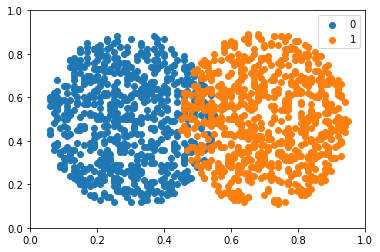

In [7]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [9]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCal(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=3000;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1


## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [11]:
#
def SPSA(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCal(i,th+np.array(c))-lossCal(i,th-np.array(c)))/(2*delta))

    return sp


## nshot=1000

In [ ]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSA(i,theta,c1,delta)
        print(lossCal(i,theta))
        progress.append(lossCal(i,theta))
        thdata.append(theta)

In [ ]:
plt.plot(progress)

## Single data

In [15]:
progress=[];
theta=[0,0,0,0,0,0,0,0];
thdata=[];
c1=0.01;   
delta=6;
theta=np.array(theta)-SPSA(1,theta,c1,delta)
for ep in range(10000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.4 th= [ 0.03   0.016 -0.023  0.068 -0.01  -0.028 -0.006  0.034]  iter= 0
L= 1.39 th= [ 0.035  0.007 -0.029  0.077 -0.019 -0.02  -0.022  0.028]  iter= 1
L= 1.41 th= [ 0.045 -0.03  -0.011  0.096 -0.03  -0.022  0.023  0.06 ]  iter= 2
L= 1.39 th= [ 0.07  -0.04  -0.041  0.089 -0.014 -0.021  0.019  0.061]  iter= 3
L= 1.4 th= [ 0.087 -0.024 -0.004  0.091 -0.037 -0.052  0.024  0.042]  iter= 4
L= 1.42 th= [ 0.097 -0.019 -0.008  0.074 -0.046 -0.048  0.005  0.048]  iter= 5
L= 1.42 th= [ 0.1   -0.039 -0.033  0.092 -0.019 -0.051 -0.     0.045]  iter= 6
L= 1.38 th= [ 0.125 -0.043 -0.068  0.111  0.023 -0.038  0.012  0.031]  iter= 7
L= 1.41 th= [ 0.085 -0.008 -0.088  0.137 -0.033 -0.033 -0.04   0.001]  iter= 8
L= 1.39 th= [ 0.063  0.006 -0.082  0.112 -0.02  -0.036 -0.033  0.004]  iter= 9
L= 1.38 th= [ 0.052  0.015 -0.072  0.088 -0.04  -0.052 -0.009  0.017]  iter= 10
L= 1.43 th= [ 0.063  0.026 -0.081  0.104 -0.044 -0.034 -0.017 -0.025]  iter= 11
L= 1.39 th= [ 0.056  0.023 -0.075  0.107 -0.037 -0.0

L= 1.36 th= [ 0.184 -0.183 -0.158 -0.192 -0.081 -0.145 -0.243 -0.232]  iter= 103
L= 1.34 th= [ 0.158 -0.195 -0.169 -0.187 -0.085 -0.139 -0.25  -0.228]  iter= 104
L= 1.34 th= [ 0.135 -0.211 -0.195 -0.197 -0.086 -0.151 -0.278 -0.202]  iter= 105
L= 1.34 th= [ 0.097 -0.203 -0.2   -0.191 -0.092 -0.159 -0.297 -0.189]  iter= 106
L= 1.33 th= [ 0.099 -0.205 -0.212 -0.202 -0.087 -0.162 -0.297 -0.219]  iter= 107
L= 1.37 th= [ 0.117 -0.208 -0.207 -0.224 -0.075 -0.162 -0.292 -0.195]  iter= 108
L= 1.35 th= [ 0.131 -0.214 -0.219 -0.219 -0.068 -0.178 -0.285 -0.193]  iter= 109
L= 1.35 th= [ 0.119 -0.22  -0.21  -0.241 -0.065 -0.195 -0.294 -0.188]  iter= 110
L= 1.31 th= [ 0.135 -0.241 -0.19  -0.296 -0.089 -0.237 -0.244 -0.159]  iter= 111
L= 1.34 th= [ 0.145 -0.2   -0.184 -0.333 -0.111 -0.228 -0.223 -0.117]  iter= 112
L= 1.31 th= [ 0.125 -0.21  -0.182 -0.34  -0.105 -0.239 -0.235 -0.138]  iter= 113
L= 1.34 th= [ 0.075 -0.266 -0.217 -0.34  -0.134 -0.226 -0.273 -0.145]  iter= 114
L= 1.31 th= [ 0.074 -0.264 -

L= 1.15 th= [-0.503 -0.882 -0.699 -0.868 -0.916 -0.982 -0.735 -0.515]  iter= 205
L= 1.15 th= [-0.534 -0.91  -0.719 -0.889 -0.926 -0.978 -0.748 -0.481]  iter= 206
L= 1.14 th= [-0.533 -0.918 -0.712 -0.899 -0.922 -0.979 -0.75  -0.489]  iter= 207
L= 1.11 th= [-0.529 -0.95  -0.734 -0.911 -0.956 -1.011 -0.714 -0.545]  iter= 208
L= 1.09 th= [-0.533 -0.909 -0.746 -0.913 -0.938 -1.055 -0.657 -0.554]  iter= 209
L= 1.1 th= [-0.527 -0.894 -0.744 -0.922 -0.988 -1.045 -0.643 -0.58 ]  iter= 210
L= 1.09 th= [-0.561 -0.897 -0.75  -0.94  -0.974 -1.03  -0.657 -0.578]  iter= 211
L= 1.09 th= [-0.55  -0.914 -0.744 -0.929 -0.979 -1.066 -0.644 -0.624]  iter= 212
L= 1.13 th= [-0.536 -0.918 -0.772 -0.896 -0.979 -1.069 -0.664 -0.622]  iter= 213
L= 1.08 th= [-0.564 -0.902 -0.805 -0.888 -0.976 -1.065 -0.649 -0.636]  iter= 214
L= 1.08 th= [-0.575 -0.9   -0.821 -0.883 -0.981 -1.086 -0.609 -0.649]  iter= 215
L= 1.11 th= [-0.583 -0.905 -0.81  -0.924 -0.946 -1.109 -0.648 -0.614]  iter= 216
L= 1.09 th= [-0.603 -0.916 -0

L= 1.02 th= [-0.737 -1.575 -1.38  -1.18  -1.042 -1.014 -1.129 -0.575]  iter= 307
L= 1.0 th= [-0.763 -1.561 -1.38  -1.207 -1.032 -0.985 -1.115 -0.58 ]  iter= 308
L= 1.05 th= [-0.777 -1.569 -1.402 -1.214 -1.054 -1.004 -1.122 -0.569]  iter= 309
L= 1.0 th= [-0.785 -1.554 -1.401 -1.216 -1.058 -1.014 -1.133 -0.559]  iter= 310
L= 1.0 th= [-0.78  -1.547 -1.383 -1.225 -1.07  -1.004 -1.139 -0.536]  iter= 311
L= 1.0 th= [-0.779 -1.539 -1.385 -1.203 -1.069 -1.021 -1.139 -0.516]  iter= 312
L= 1.01 th= [-0.773 -1.535 -1.385 -1.196 -1.082 -1.029 -1.137 -0.509]  iter= 313
L= 1.03 th= [-0.77  -1.544 -1.379 -1.209 -1.083 -1.039 -1.112 -0.514]  iter= 314
L= 1.0 th= [-0.77  -1.545 -1.377 -1.197 -1.09  -1.009 -1.157 -0.522]  iter= 315
L= 1.02 th= [-0.785 -1.537 -1.354 -1.21  -1.078 -1.02  -1.164 -0.549]  iter= 316
L= 1.0 th= [-0.795 -1.546 -1.353 -1.23  -1.085 -1.018 -1.175 -0.553]  iter= 317
L= 1.05 th= [-0.802 -1.579 -1.347 -1.237 -1.074 -1.037 -1.185 -0.514]  iter= 318
L= 1.02 th= [-0.789 -1.545 -1.314 

L= 1.01 th= [-0.747 -1.662 -1.253 -1.23  -1.032 -1.237 -1.353 -0.575]  iter= 409
L= 1.01 th= [-0.755 -1.664 -1.24  -1.234 -1.038 -1.238 -1.359 -0.574]  iter= 410
L= 0.99 th= [-0.77  -1.67  -1.266 -1.245 -1.012 -1.26  -1.368 -0.579]  iter= 411
L= 0.99 th= [-0.756 -1.659 -1.257 -1.273 -0.991 -1.252 -1.397 -0.583]  iter= 412
L= 1.01 th= [-0.76  -1.668 -1.272 -1.279 -0.976 -1.239 -1.418 -0.579]  iter= 413
L= 0.99 th= [-0.788 -1.656 -1.271 -1.279 -0.976 -1.243 -1.435 -0.601]  iter= 414
L= 1.0 th= [-0.786 -1.649 -1.264 -1.241 -0.987 -1.232 -1.477 -0.604]  iter= 415
L= 0.98 th= [-0.783 -1.651 -1.257 -1.225 -0.991 -1.233 -1.488 -0.602]  iter= 416
L= 1.0 th= [-0.774 -1.667 -1.242 -1.23  -1.007 -1.225 -1.505 -0.613]  iter= 417
L= 1.02 th= [-0.773 -1.678 -1.282 -1.251 -1.023 -1.249 -1.478 -0.587]  iter= 418
L= 0.98 th= [-0.775 -1.691 -1.285 -1.243 -1.031 -1.234 -1.465 -0.601]  iter= 419
L= 0.99 th= [-0.77  -1.737 -1.293 -1.262 -1.031 -1.286 -1.464 -0.594]  iter= 420
L= 0.98 th= [-0.804 -1.738 -1.

L= 0.97 th= [-0.655 -1.868 -1.197 -1.507 -1.209 -1.224 -1.571 -0.723]  iter= 511
L= 1.0 th= [-0.661 -1.871 -1.194 -1.52  -1.202 -1.211 -1.563 -0.72 ]  iter= 512
L= 0.97 th= [-0.664 -1.83  -1.199 -1.584 -1.182 -1.203 -1.548 -0.746]  iter= 513
L= 1.0 th= [-0.661 -1.814 -1.211 -1.582 -1.177 -1.187 -1.579 -0.737]  iter= 514
L= 0.97 th= [-0.645 -1.828 -1.213 -1.573 -1.182 -1.187 -1.558 -0.704]  iter= 515
L= 0.94 th= [-0.646 -1.852 -1.221 -1.572 -1.17  -1.186 -1.553 -0.7  ]  iter= 516
L= 0.98 th= [-0.695 -1.841 -1.185 -1.53  -1.185 -1.239 -1.55  -0.682]  iter= 517
L= 1.02 th= [-0.685 -1.851 -1.186 -1.509 -1.199 -1.217 -1.542 -0.694]  iter= 518
L= 0.98 th= [-0.693 -1.854 -1.199 -1.502 -1.228 -1.241 -1.54  -0.696]  iter= 519
L= 0.99 th= [-0.691 -1.862 -1.198 -1.505 -1.22  -1.244 -1.541 -0.696]  iter= 520
L= 0.99 th= [-0.68  -1.897 -1.18  -1.518 -1.238 -1.211 -1.54  -0.69 ]  iter= 521
L= 1.0 th= [-0.675 -1.924 -1.209 -1.51  -1.266 -1.255 -1.533 -0.694]  iter= 522
L= 1.0 th= [-0.669 -1.912 -1.21

L= 0.98 th= [-0.202 -1.971 -1.213 -1.614 -1.51  -1.437 -1.571 -0.636]  iter= 613
L= 0.94 th= [-0.219 -1.972 -1.273 -1.624 -1.509 -1.424 -1.577 -0.672]  iter= 614
L= 0.99 th= [-0.207 -1.981 -1.305 -1.632 -1.519 -1.42  -1.568 -0.673]  iter= 615
L= 0.96 th= [-0.204 -1.984 -1.294 -1.651 -1.511 -1.445 -1.558 -0.669]  iter= 616
L= 0.97 th= [-0.211 -1.972 -1.305 -1.644 -1.509 -1.438 -1.563 -0.678]  iter= 617
L= 0.98 th= [-0.212 -1.98  -1.294 -1.669 -1.5   -1.421 -1.603 -0.701]  iter= 618
L= 0.98 th= [-0.21  -1.971 -1.277 -1.684 -1.499 -1.421 -1.613 -0.695]  iter= 619
L= 0.98 th= [-0.177 -2.021 -1.273 -1.7   -1.479 -1.425 -1.603 -0.764]  iter= 620
L= 0.96 th= [-0.174 -2.034 -1.273 -1.699 -1.491 -1.436 -1.574 -0.779]  iter= 621
L= 0.99 th= [-0.141 -2.04  -1.301 -1.712 -1.475 -1.448 -1.509 -0.816]  iter= 622
L= 0.99 th= [-0.127 -1.932 -1.327 -1.655 -1.488 -1.456 -1.455 -0.822]  iter= 623
L= 0.96 th= [-0.152 -1.932 -1.316 -1.67  -1.46  -1.448 -1.459 -0.819]  iter= 624
L= 1.0 th= [-0.155 -1.964 -1

L= 0.99 th= [-0.038 -2.019 -1.122 -1.45  -0.925 -1.252 -1.624 -0.77 ]  iter= 714
L= 0.99 th= [-0.07  -2.024 -1.097 -1.44  -0.916 -1.234 -1.603 -0.758]  iter= 715
L= 0.98 th= [-0.082 -2.001 -1.064 -1.47  -0.92  -1.239 -1.61  -0.759]  iter= 716
L= 0.97 th= [-0.089 -2.016 -1.064 -1.472 -0.902 -1.25  -1.608 -0.751]  iter= 717
L= 0.98 th= [-0.094 -2.036 -1.031 -1.481 -0.909 -1.261 -1.591 -0.767]  iter= 718
L= 0.95 th= [-0.083 -2.039 -1.029 -1.516 -0.915 -1.265 -1.582 -0.764]  iter= 719
L= 0.96 th= [-0.105 -2.019 -1.022 -1.525 -0.919 -1.265 -1.588 -0.77 ]  iter= 720
L= 0.97 th= [-0.104 -2.026 -1.034 -1.543 -0.906 -1.246 -1.568 -0.8  ]  iter= 721
L= 0.96 th= [-0.097 -2.02  -1.021 -1.536 -0.908 -1.237 -1.556 -0.795]  iter= 722
L= 0.96 th= [-0.104 -2.012 -1.02  -1.527 -0.921 -1.241 -1.542 -0.807]  iter= 723
L= 0.94 th= [-0.108 -2.036 -1.007 -1.538 -0.941 -1.22  -1.543 -0.806]  iter= 724
L= 0.97 th= [-0.117 -2.023 -1.006 -1.525 -0.955 -1.233 -1.525 -0.808]  iter= 725
L= 0.98 th= [-0.105 -2.025 -

L= 0.97 th= [-0.42  -2.262 -1.192 -1.605 -1.074 -0.991 -1.52  -0.98 ]  iter= 816
L= 1.0 th= [-0.442 -2.27  -1.173 -1.608 -1.063 -0.972 -1.503 -0.983]  iter= 817
L= 0.96 th= [-0.477 -2.272 -1.202 -1.602 -1.085 -0.975 -1.493 -1.008]  iter= 818
L= 0.96 th= [-0.47  -2.261 -1.202 -1.613 -1.06  -0.965 -1.51  -1.002]  iter= 819
L= 0.96 th= [-0.477 -2.19  -1.16  -1.582 -1.041 -0.931 -1.566 -0.978]  iter= 820
L= 0.95 th= [-0.458 -2.218 -1.17  -1.582 -1.044 -0.95  -1.548 -0.987]  iter= 821
L= 0.97 th= [-0.436 -2.253 -1.159 -1.549 -1.056 -0.988 -1.486 -0.973]  iter= 822
L= 1.01 th= [-0.464 -2.241 -1.186 -1.518 -1.068 -1.    -1.486 -0.954]  iter= 823
L= 0.97 th= [-0.463 -2.215 -1.171 -1.488 -1.057 -0.999 -1.498 -0.958]  iter= 824
L= 0.97 th= [-0.459 -2.22  -1.172 -1.479 -1.061 -1.001 -1.491 -0.985]  iter= 825
L= 1.0 th= [-0.469 -2.22  -1.152 -1.46  -1.044 -1.004 -1.502 -0.988]  iter= 826
L= 0.99 th= [-0.509 -2.248 -1.155 -1.437 -1.013 -1.036 -1.486 -0.942]  iter= 827
L= 0.98 th= [-0.51  -2.243 -1.

L= 1.02 th= [-0.549 -2.65  -1.296 -1.323 -1.252 -1.604 -1.878 -0.935]  iter= 918
L= 1.01 th= [-0.528 -2.654 -1.278 -1.308 -1.258 -1.602 -1.872 -0.965]  iter= 919
L= 1.04 th= [-0.591 -2.646 -1.232 -1.252 -1.264 -1.59  -1.878 -0.925]  iter= 920
L= 1.02 th= [-0.56  -2.637 -1.2   -1.244 -1.243 -1.655 -1.775 -0.975]  iter= 921
L= 1.0 th= [-0.56  -2.644 -1.208 -1.26  -1.243 -1.634 -1.771 -1.01 ]  iter= 922
L= 1.02 th= [-0.568 -2.636 -1.217 -1.264 -1.26  -1.642 -1.781 -0.996]  iter= 923
L= 1.01 th= [-0.565 -2.646 -1.214 -1.252 -1.265 -1.635 -1.778 -0.972]  iter= 924
L= 0.98 th= [-0.568 -2.649 -1.213 -1.271 -1.258 -1.638 -1.774 -0.979]  iter= 925
L= 1.01 th= [-0.558 -2.646 -1.211 -1.281 -1.233 -1.633 -1.781 -0.993]  iter= 926
L= 1.02 th= [-0.557 -2.649 -1.19  -1.247 -1.226 -1.646 -1.777 -0.988]  iter= 927
L= 1.02 th= [-0.556 -2.637 -1.18  -1.242 -1.216 -1.639 -1.784 -0.997]  iter= 928
L= 1.01 th= [-0.562 -2.623 -1.198 -1.219 -1.202 -1.642 -1.788 -1.001]  iter= 929
L= 0.97 th= [-0.559 -2.629 -1

L= 1.0 th= [-0.395 -2.53  -1.317 -1.479 -0.967 -1.811 -2.148 -0.967]  iter= 1020
L= 0.98 th= [-0.413 -2.554 -1.297 -1.492 -0.967 -1.813 -2.14  -0.98 ]  iter= 1021
L= 0.99 th= [-0.409 -2.567 -1.315 -1.494 -0.958 -1.796 -2.146 -0.987]  iter= 1022
L= 1.0 th= [-0.419 -2.615 -1.314 -1.523 -0.961 -1.787 -2.129 -0.969]  iter= 1023
L= 1.01 th= [-0.418 -2.622 -1.323 -1.504 -0.96  -1.787 -2.119 -0.97 ]  iter= 1024
L= 1.01 th= [-0.419 -2.612 -1.333 -1.529 -0.974 -1.805 -2.113 -1.027]  iter= 1025
L= 0.98 th= [-0.438 -2.597 -1.352 -1.551 -0.95  -1.837 -2.113 -0.996]  iter= 1026
L= 0.99 th= [-0.41  -2.575 -1.335 -1.538 -0.952 -1.816 -2.123 -0.987]  iter= 1027
L= 0.98 th= [-0.41  -2.557 -1.316 -1.54  -0.937 -1.828 -2.121 -0.978]  iter= 1028
L= 0.96 th= [-0.395 -2.57  -1.28  -1.568 -0.931 -1.836 -2.107 -0.965]  iter= 1029
L= 0.99 th= [-0.407 -2.554 -1.297 -1.564 -0.929 -1.854 -2.084 -0.957]  iter= 1030
L= 0.98 th= [-0.415 -2.557 -1.336 -1.542 -0.943 -1.847 -2.048 -0.97 ]  iter= 1031
L= 1.0 th= [-0.447

L= 0.98 th= [-0.409 -2.401 -1.232 -1.447 -0.66  -1.792 -2.036 -0.914]  iter= 1122
L= 1.03 th= [-0.396 -2.391 -1.268 -1.459 -0.669 -1.789 -2.009 -0.903]  iter= 1123
L= 0.99 th= [-0.407 -2.391 -1.264 -1.469 -0.686 -1.788 -2.    -0.917]  iter= 1124
L= 1.01 th= [-0.383 -2.394 -1.307 -1.467 -0.686 -1.771 -2.014 -0.896]  iter= 1125
L= 1.0 th= [-0.387 -2.387 -1.307 -1.484 -0.684 -1.763 -1.996 -0.876]  iter= 1126
L= 0.95 th= [-0.407 -2.356 -1.285 -1.484 -0.69  -1.744 -1.984 -0.889]  iter= 1127
L= 0.99 th= [-0.402 -2.351 -1.307 -1.481 -0.681 -1.732 -1.976 -0.886]  iter= 1128
L= 1.0 th= [-0.406 -2.296 -1.345 -1.427 -0.668 -1.78  -1.931 -0.879]  iter= 1129
L= 1.0 th= [-0.47  -2.287 -1.357 -1.438 -0.688 -1.842 -1.886 -0.861]  iter= 1130
L= 1.0 th= [-0.498 -2.275 -1.336 -1.448 -0.674 -1.817 -1.859 -0.913]  iter= 1131
L= 1.01 th= [-0.486 -2.248 -1.347 -1.442 -0.655 -1.827 -1.859 -0.931]  iter= 1132
L= 0.96 th= [-0.472 -2.208 -1.339 -1.449 -0.672 -1.84  -1.858 -0.963]  iter= 1133
L= 1.04 th= [-0.486 

L= 1.0 th= [-0.514 -2.167 -1.283 -1.377 -0.71  -1.681 -2.246 -1.148]  iter= 1224
L= 1.03 th= [-0.496 -2.177 -1.295 -1.387 -0.698 -1.676 -2.24  -1.13 ]  iter= 1225
L= 0.97 th= [-0.518 -2.174 -1.265 -1.374 -0.692 -1.677 -2.216 -1.155]  iter= 1226
L= 0.99 th= [-0.518 -2.168 -1.267 -1.376 -0.687 -1.696 -2.225 -1.153]  iter= 1227
L= 1.02 th= [-0.523 -2.211 -1.303 -1.415 -0.643 -1.678 -2.224 -1.189]  iter= 1228
L= 0.99 th= [-0.462 -2.208 -1.27  -1.403 -0.654 -1.689 -2.237 -1.194]  iter= 1229
L= 0.97 th= [-0.46  -2.189 -1.267 -1.395 -0.651 -1.705 -2.235 -1.222]  iter= 1230
L= 1.03 th= [-0.428 -2.183 -1.267 -1.381 -0.639 -1.707 -2.254 -1.212]  iter= 1231
L= 1.0 th= [-0.427 -2.142 -1.285 -1.423 -0.683 -1.68  -2.272 -1.223]  iter= 1232
L= 1.02 th= [-0.437 -2.168 -1.272 -1.443 -0.703 -1.682 -2.266 -1.225]  iter= 1233
L= 1.0 th= [-0.429 -2.218 -1.24  -1.455 -0.708 -1.698 -2.278 -1.213]  iter= 1234
L= 0.98 th= [-0.443 -2.229 -1.239 -1.452 -0.708 -1.683 -2.294 -1.233]  iter= 1235
L= 1.02 th= [-0.443

L= 1.0 th= [-0.652 -1.977 -1.129 -1.423 -1.282 -2.135 -2.573 -1.064]  iter= 1326
L= 0.98 th= [-0.634 -1.91  -1.134 -1.467 -1.283 -2.127 -2.58  -1.052]  iter= 1327
L= 0.96 th= [-0.647 -1.904 -1.137 -1.453 -1.243 -2.186 -2.572 -1.054]  iter= 1328
L= 1.01 th= [-0.66  -1.907 -1.15  -1.464 -1.23  -2.171 -2.58  -1.051]  iter= 1329
L= 1.02 th= [-0.646 -1.912 -1.147 -1.452 -1.235 -2.176 -2.591 -1.039]  iter= 1330
L= 1.01 th= [-0.639 -1.87  -1.116 -1.495 -1.236 -2.154 -2.581 -1.04 ]  iter= 1331
L= 1.0 th= [-0.65  -1.894 -1.114 -1.551 -1.172 -2.183 -2.551 -1.035]  iter= 1332
L= 1.0 th= [-0.735 -1.882 -1.079 -1.521 -1.161 -2.257 -2.557 -1.001]  iter= 1333
L= 0.96 th= [-0.733 -1.88  -1.086 -1.497 -1.165 -2.276 -2.553 -0.995]  iter= 1334
L= 0.98 th= [-0.737 -1.909 -1.085 -1.487 -1.192 -2.273 -2.54  -0.996]  iter= 1335
L= 0.98 th= [-0.753 -1.91  -1.101 -1.505 -1.199 -2.294 -2.541 -0.992]  iter= 1336
L= 1.01 th= [-0.748 -1.927 -1.112 -1.515 -1.209 -2.289 -2.54  -1.005]  iter= 1337
L= 0.99 th= [-0.819

L= 0.97 th= [-1.21  -1.958 -1.273 -1.717 -1.191 -2.112 -2.612 -0.976]  iter= 1428
L= 0.95 th= [-1.191 -1.954 -1.294 -1.707 -1.176 -2.134 -2.627 -0.965]  iter= 1429
L= 0.98 th= [-1.174 -1.902 -1.323 -1.71  -1.191 -2.122 -2.658 -0.939]  iter= 1430
L= 1.02 th= [-1.172 -1.909 -1.321 -1.704 -1.184 -2.112 -2.666 -0.936]  iter= 1431
L= 0.97 th= [-1.191 -1.901 -1.297 -1.732 -1.213 -2.092 -2.632 -0.981]  iter= 1432
L= 0.97 th= [-1.189 -1.877 -1.303 -1.77  -1.217 -2.129 -2.607 -1.011]  iter= 1433
L= 0.98 th= [-1.183 -1.873 -1.311 -1.776 -1.21  -2.114 -2.623 -1.009]  iter= 1434
L= 0.96 th= [-1.176 -1.872 -1.3   -1.778 -1.2   -2.118 -2.617 -0.986]  iter= 1435
L= 0.96 th= [-1.196 -1.86  -1.272 -1.778 -1.191 -2.102 -2.614 -0.968]  iter= 1436
L= 1.0 th= [-1.208 -1.859 -1.27  -1.769 -1.196 -2.086 -2.615 -0.959]  iter= 1437
L= 0.92 th= [-1.205 -1.901 -1.238 -1.783 -1.195 -2.132 -2.603 -0.974]  iter= 1438
L= 0.95 th= [-1.22  -1.916 -1.2   -1.783 -1.195 -2.124 -2.576 -0.986]  iter= 1439
L= 0.98 th= [-1.1

L= 0.92 th= [-1.129 -1.824 -1.041 -1.912 -0.908 -2.253 -2.474 -0.955]  iter= 1529
L= 0.92 th= [-1.155 -1.829 -1.045 -1.946 -0.91  -2.244 -2.462 -0.938]  iter= 1530
L= 0.87 th= [-1.169 -1.834 -1.056 -1.923 -0.93  -2.247 -2.483 -0.914]  iter= 1531
L= 0.93 th= [-1.189 -1.864 -1.105 -1.923 -0.918 -2.286 -2.492 -0.909]  iter= 1532
L= 0.93 th= [-1.187 -1.877 -1.114 -1.92  -0.912 -2.297 -2.494 -0.936]  iter= 1533
L= 0.92 th= [-1.192 -1.876 -1.12  -1.887 -0.891 -2.282 -2.508 -0.943]  iter= 1534
L= 0.96 th= [-1.167 -1.896 -1.15  -1.877 -0.932 -2.263 -2.504 -0.965]  iter= 1535
L= 0.92 th= [-1.171 -1.883 -1.158 -1.868 -0.949 -2.254 -2.505 -0.982]  iter= 1536
L= 0.94 th= [-1.154 -1.875 -1.112 -1.891 -0.919 -2.254 -2.561 -0.966]  iter= 1537
L= 0.95 th= [-1.156 -1.882 -1.129 -1.856 -0.917 -2.262 -2.561 -0.967]  iter= 1538
L= 0.94 th= [-1.152 -1.867 -1.114 -1.841 -0.904 -2.29  -2.547 -0.961]  iter= 1539
L= 0.94 th= [-1.176 -1.876 -1.096 -1.83  -0.909 -2.289 -2.536 -0.976]  iter= 1540
L= 0.92 th= [-1.

L= 0.93 th= [-1.259 -1.752 -0.963 -1.649 -1.014 -2.19  -2.574 -0.868]  iter= 1629
L= 0.93 th= [-1.287 -1.731 -0.976 -1.659 -1.018 -2.185 -2.562 -0.861]  iter= 1630
L= 0.93 th= [-1.257 -1.733 -0.988 -1.655 -1.026 -2.189 -2.558 -0.862]  iter= 1631
L= 0.96 th= [-1.256 -1.745 -0.981 -1.645 -1.029 -2.192 -2.551 -0.871]  iter= 1632
L= 0.92 th= [-1.292 -1.731 -0.994 -1.705 -1.042 -2.106 -2.577 -0.78 ]  iter= 1633
L= 0.9 th= [-1.279 -1.731 -0.994 -1.696 -1.054 -2.108 -2.57  -0.781]  iter= 1634
L= 0.96 th= [-1.265 -1.742 -1.016 -1.671 -1.059 -2.114 -2.548 -0.77 ]  iter= 1635
L= 0.93 th= [-1.256 -1.736 -1.019 -1.65  -1.034 -2.102 -2.527 -0.768]  iter= 1636
L= 0.92 th= [-1.293 -1.73  -1.078 -1.629 -1.052 -2.142 -2.534 -0.782]  iter= 1637
L= 0.96 th= [-1.312 -1.716 -1.065 -1.617 -1.033 -2.142 -2.559 -0.789]  iter= 1638
L= 0.98 th= [-1.33  -1.676 -1.056 -1.594 -0.998 -2.131 -2.554 -0.797]  iter= 1639
L= 0.96 th= [-1.339 -1.67  -1.065 -1.588 -1.015 -2.162 -2.547 -0.771]  iter= 1640
L= 0.97 th= [-1.3

L= 0.99 th= [-1.142 -1.644 -1.265 -1.237 -1.255 -2.464 -2.576 -0.745]  iter= 1731
L= 1.04 th= [-1.162 -1.667 -1.28  -1.279 -1.232 -2.483 -2.53  -0.733]  iter= 1732
L= 0.98 th= [-1.158 -1.677 -1.285 -1.276 -1.262 -2.499 -2.542 -0.715]  iter= 1733
L= 0.99 th= [-1.176 -1.644 -1.29  -1.264 -1.268 -2.475 -2.548 -0.713]  iter= 1734
L= 0.99 th= [-1.151 -1.666 -1.263 -1.29  -1.295 -2.461 -2.554 -0.737]  iter= 1735
L= 1.04 th= [-1.172 -1.699 -1.196 -1.314 -1.263 -2.42  -2.6   -0.779]  iter= 1736
L= 1.0 th= [-1.159 -1.686 -1.211 -1.287 -1.263 -2.419 -2.582 -0.767]  iter= 1737
L= 0.99 th= [-1.134 -1.662 -1.166 -1.265 -1.274 -2.444 -2.62  -0.754]  iter= 1738
L= 1.03 th= [-1.159 -1.668 -1.188 -1.274 -1.28  -2.409 -2.605 -0.732]  iter= 1739
L= 1.0 th= [-1.182 -1.674 -1.206 -1.313 -1.247 -2.397 -2.598 -0.718]  iter= 1740
L= 1.01 th= [-1.219 -1.703 -1.192 -1.283 -1.233 -2.418 -2.594 -0.708]  iter= 1741
L= 1.02 th= [-1.249 -1.685 -1.182 -1.285 -1.235 -2.414 -2.565 -0.705]  iter= 1742
L= 1.02 th= [-1.24

L= 1.02 th= [-1.438 -1.856 -1.248 -1.293 -1.104 -2.5   -2.584 -0.761]  iter= 1832
L= 1.02 th= [-1.403 -1.854 -1.215 -1.307 -1.139 -2.503 -2.594 -0.793]  iter= 1833
L= 0.96 th= [-1.395 -1.855 -1.219 -1.312 -1.135 -2.502 -2.597 -0.782]  iter= 1834
L= 1.01 th= [-1.4   -1.859 -1.227 -1.304 -1.131 -2.514 -2.606 -0.777]  iter= 1835
L= 1.0 th= [-1.384 -1.872 -1.229 -1.31  -1.136 -2.526 -2.615 -0.77 ]  iter= 1836
L= 0.99 th= [-1.396 -1.863 -1.251 -1.346 -1.131 -2.526 -2.606 -0.76 ]  iter= 1837
L= 0.97 th= [-1.395 -1.852 -1.256 -1.371 -1.131 -2.52  -2.583 -0.736]  iter= 1838
L= 1.02 th= [-1.414 -1.846 -1.258 -1.374 -1.147 -2.519 -2.582 -0.731]  iter= 1839
L= 1.01 th= [-1.42  -1.854 -1.255 -1.369 -1.16  -2.521 -2.579 -0.724]  iter= 1840
L= 0.99 th= [-1.393 -1.796 -1.176 -1.382 -1.151 -2.545 -2.6   -0.723]  iter= 1841
L= 0.96 th= [-1.401 -1.809 -1.168 -1.406 -1.17  -2.543 -2.6   -0.741]  iter= 1842
L= 1.0 th= [-1.399 -1.817 -1.17  -1.408 -1.183 -2.549 -2.585 -0.731]  iter= 1843
L= 0.98 th= [-1.37

L= 1.0 th= [-1.772 -1.762 -1.17  -1.54  -1.157 -2.629 -2.712 -1.009]  iter= 1933
L= 0.99 th= [-1.794 -1.776 -1.169 -1.564 -1.171 -2.654 -2.701 -1.026]  iter= 1934
L= 0.96 th= [-1.825 -1.734 -1.182 -1.581 -1.22  -2.681 -2.654 -1.006]  iter= 1935
L= 0.96 th= [-1.795 -1.743 -1.146 -1.601 -1.259 -2.686 -2.695 -1.039]  iter= 1936
L= 0.97 th= [-1.771 -1.78  -1.154 -1.591 -1.246 -2.679 -2.739 -1.033]  iter= 1937
L= 0.99 th= [-1.759 -1.761 -1.132 -1.578 -1.253 -2.673 -2.721 -1.055]  iter= 1938
L= 0.97 th= [-1.772 -1.773 -1.134 -1.563 -1.261 -2.67  -2.722 -1.069]  iter= 1939
L= 0.98 th= [-1.782 -1.779 -1.139 -1.577 -1.257 -2.673 -2.736 -1.073]  iter= 1940
L= 0.98 th= [-1.804 -1.78  -1.154 -1.572 -1.271 -2.67  -2.73  -1.085]  iter= 1941
L= 0.99 th= [-1.808 -1.799 -1.155 -1.572 -1.225 -2.681 -2.723 -1.057]  iter= 1942
L= 0.97 th= [-1.819 -1.783 -1.168 -1.587 -1.229 -2.678 -2.716 -1.05 ]  iter= 1943
L= 0.95 th= [-1.823 -1.789 -1.184 -1.598 -1.265 -2.681 -2.744 -1.021]  iter= 1944
L= 0.97 th= [-1.8

L= 0.85 th= [-1.737 -1.955 -0.694 -1.934 -1.125 -2.661 -2.805 -0.888]  iter= 2033
L= 0.85 th= [-1.739 -1.949 -0.69  -1.947 -1.145 -2.656 -2.818 -0.866]  iter= 2034
L= 0.85 th= [-1.663 -1.934 -0.765 -1.931 -1.163 -2.663 -2.844 -0.811]  iter= 2035
L= 0.89 th= [-1.666 -1.944 -0.751 -1.931 -1.154 -2.666 -2.844 -0.819]  iter= 2036
L= 0.85 th= [-1.634 -1.934 -0.753 -1.911 -1.174 -2.663 -2.853 -0.845]  iter= 2037
L= 0.86 th= [-1.617 -1.932 -0.788 -1.876 -1.193 -2.679 -2.858 -0.874]  iter= 2038
L= 0.87 th= [-1.596 -1.935 -0.798 -1.888 -1.207 -2.689 -2.872 -0.868]  iter= 2039
L= 0.85 th= [-1.576 -1.926 -0.789 -1.913 -1.194 -2.69  -2.895 -0.859]  iter= 2040
L= 0.92 th= [-1.563 -1.927 -0.8   -1.896 -1.195 -2.694 -2.878 -0.829]  iter= 2041
L= 0.87 th= [-1.569 -1.936 -0.797 -1.91  -1.197 -2.689 -2.879 -0.829]  iter= 2042
L= 0.85 th= [-1.584 -1.944 -0.806 -1.887 -1.21  -2.661 -2.906 -0.827]  iter= 2043
L= 0.9 th= [-1.59  -1.961 -0.801 -1.863 -1.183 -2.638 -2.928 -0.845]  iter= 2044
L= 0.87 th= [-1.5

L= 0.87 th= [-1.658 -2.052 -0.932 -1.878 -1.161 -2.354 -2.99  -0.924]  iter= 2135
L= 0.92 th= [-1.653 -2.075 -0.94  -1.916 -1.146 -2.356 -3.005 -0.936]  iter= 2136
L= 0.89 th= [-1.65  -2.092 -0.916 -1.902 -1.132 -2.352 -3.032 -0.93 ]  iter= 2137
L= 0.88 th= [-1.689 -2.091 -0.905 -1.909 -1.104 -2.391 -3.042 -0.96 ]  iter= 2138
L= 0.87 th= [-1.707 -2.087 -0.887 -1.923 -1.118 -2.373 -3.041 -0.993]  iter= 2139
L= 0.86 th= [-1.69  -2.087 -0.862 -1.917 -1.146 -2.378 -3.047 -1.004]  iter= 2140
L= 0.9 th= [-1.701 -2.085 -0.837 -1.926 -1.158 -2.372 -3.06  -1.001]  iter= 2141
L= 0.89 th= [-1.709 -2.098 -0.848 -1.929 -1.138 -2.358 -3.062 -0.987]  iter= 2142
L= 0.92 th= [-1.682 -2.093 -0.842 -1.92  -1.152 -2.352 -3.066 -0.985]  iter= 2143
L= 0.85 th= [-1.676 -2.096 -0.814 -1.94  -1.147 -2.357 -3.058 -0.98 ]  iter= 2144
L= 0.87 th= [-1.658 -2.137 -0.834 -1.912 -1.163 -2.361 -3.033 -0.992]  iter= 2145
L= 0.88 th= [-1.673 -2.129 -0.775 -1.926 -1.201 -2.364 -3.075 -0.961]  iter= 2146
L= 0.88 th= [-1.6

L= 0.91 th= [-1.652 -2.416 -0.707 -1.77  -1.016 -2.235 -3.319 -1.258]  iter= 2237
L= 0.87 th= [-1.644 -2.432 -0.741 -1.76  -1.032 -2.243 -3.299 -1.257]  iter= 2238
L= 0.91 th= [-1.661 -2.416 -0.738 -1.739 -1.027 -2.25  -3.287 -1.23 ]  iter= 2239
L= 0.9 th= [-1.688 -2.408 -0.729 -1.732 -1.037 -2.244 -3.314 -1.206]  iter= 2240
L= 0.91 th= [-1.69  -2.422 -0.741 -1.724 -1.034 -2.292 -3.287 -1.216]  iter= 2241
L= 0.87 th= [-1.707 -2.423 -0.725 -1.711 -1.048 -2.29  -3.28  -1.22 ]  iter= 2242
L= 0.93 th= [-1.722 -2.432 -0.735 -1.705 -1.045 -2.31  -3.282 -1.218]  iter= 2243
L= 0.9 th= [-1.762 -2.389 -0.701 -1.668 -1.007 -2.256 -3.258 -1.243]  iter= 2244
L= 0.9 th= [-1.755 -2.37  -0.729 -1.67  -1.047 -2.256 -3.269 -1.23 ]  iter= 2245
L= 0.91 th= [-1.761 -2.372 -0.723 -1.663 -1.029 -2.262 -3.269 -1.22 ]  iter= 2246
L= 0.94 th= [-1.767 -2.369 -0.726 -1.672 -1.019 -2.268 -3.28  -1.221]  iter= 2247
L= 0.91 th= [-1.773 -2.378 -0.742 -1.665 -1.007 -2.266 -3.274 -1.244]  iter= 2248
L= 0.92 th= [-1.774

L= 0.86 th= [-1.566 -2.415 -0.642 -1.774 -0.885 -2.281 -3.449 -1.414]  iter= 2338
L= 0.88 th= [-1.594 -2.419 -0.66  -1.801 -0.873 -2.273 -3.443 -1.395]  iter= 2339
L= 0.84 th= [-1.595 -2.402 -0.657 -1.834 -0.852 -2.265 -3.441 -1.428]  iter= 2340
L= 0.82 th= [-1.611 -2.403 -0.665 -1.854 -0.853 -2.261 -3.444 -1.453]  iter= 2341
L= 0.85 th= [-1.624 -2.404 -0.653 -1.844 -0.865 -2.242 -3.412 -1.488]  iter= 2342
L= 0.86 th= [-1.624 -2.401 -0.669 -1.777 -0.866 -2.225 -3.428 -1.519]  iter= 2343
L= 0.9 th= [-1.627 -2.386 -0.684 -1.78  -0.863 -2.221 -3.426 -1.501]  iter= 2344
L= 0.87 th= [-1.618 -2.379 -0.714 -1.782 -0.865 -2.23  -3.422 -1.497]  iter= 2345
L= 0.88 th= [-1.615 -2.375 -0.708 -1.75  -0.859 -2.255 -3.437 -1.495]  iter= 2346
L= 0.91 th= [-1.617 -2.373 -0.727 -1.742 -0.865 -2.269 -3.437 -1.492]  iter= 2347
L= 0.89 th= [-1.591 -2.406 -0.738 -1.757 -0.884 -2.286 -3.417 -1.502]  iter= 2348
L= 0.88 th= [-1.636 -2.411 -0.694 -1.799 -0.884 -2.254 -3.362 -1.437]  iter= 2349
L= 0.9 th= [-1.64

L= 0.79 th= [-1.895 -2.47  -0.655 -2.023 -0.85  -2.154 -3.405 -1.914]  iter= 2439
L= 0.76 th= [-1.893 -2.476 -0.657 -2.035 -0.886 -2.181 -3.371 -1.901]  iter= 2440
L= 0.81 th= [-1.909 -2.461 -0.689 -2.043 -0.878 -2.196 -3.357 -1.908]  iter= 2441
L= 0.84 th= [-1.925 -2.484 -0.677 -2.018 -0.87  -2.199 -3.377 -1.898]  iter= 2442
L= 0.81 th= [-1.921 -2.488 -0.657 -2.03  -0.874 -2.189 -3.347 -1.893]  iter= 2443
L= 0.82 th= [-1.913 -2.452 -0.648 -2.046 -0.873 -2.246 -3.3   -1.885]  iter= 2444
L= 0.8 th= [-1.919 -2.45  -0.663 -2.055 -0.885 -2.26  -3.316 -1.902]  iter= 2445
L= 0.79 th= [-1.917 -2.44  -0.642 -2.063 -0.875 -2.256 -3.296 -1.903]  iter= 2446
L= 0.81 th= [-1.897 -2.445 -0.656 -2.067 -0.866 -2.255 -3.301 -1.909]  iter= 2447
L= 0.82 th= [-1.897 -2.436 -0.646 -2.066 -0.885 -2.24  -3.29  -1.923]  iter= 2448
L= 0.84 th= [-1.89  -2.448 -0.661 -2.048 -0.895 -2.227 -3.283 -1.911]  iter= 2449
L= 0.84 th= [-1.899 -2.447 -0.642 -2.048 -0.899 -2.215 -3.286 -1.93 ]  iter= 2450
L= 0.81 th= [-1.8

L= 0.85 th= [-2.161 -2.373 -0.809 -2.096 -0.739 -2.386 -3.226 -2.256]  iter= 2539
L= 0.83 th= [-2.134 -2.345 -0.786 -2.102 -0.739 -2.399 -3.246 -2.242]  iter= 2540
L= 0.79 th= [-2.125 -2.366 -0.774 -2.075 -0.76  -2.411 -3.229 -2.264]  iter= 2541
L= 0.84 th= [-2.129 -2.324 -0.793 -2.064 -0.745 -2.4   -3.26  -2.26 ]  iter= 2542
L= 0.82 th= [-2.132 -2.343 -0.771 -2.094 -0.739 -2.386 -3.275 -2.263]  iter= 2543
L= 0.81 th= [-2.111 -2.335 -0.788 -2.069 -0.749 -2.355 -3.259 -2.286]  iter= 2544
L= 0.81 th= [-2.114 -2.349 -0.801 -2.066 -0.73  -2.344 -3.265 -2.305]  iter= 2545
L= 0.79 th= [-2.111 -2.341 -0.793 -2.084 -0.746 -2.34  -3.268 -2.32 ]  iter= 2546
L= 0.83 th= [-2.12  -2.347 -0.794 -2.079 -0.772 -2.346 -3.268 -2.314]  iter= 2547
L= 0.84 th= [-2.132 -2.326 -0.81  -2.094 -0.788 -2.342 -3.268 -2.333]  iter= 2548
L= 0.82 th= [-2.099 -2.279 -0.791 -2.11  -0.76  -2.373 -3.268 -2.361]  iter= 2549
L= 0.82 th= [-2.079 -2.271 -0.789 -2.101 -0.763 -2.372 -3.237 -2.344]  iter= 2550
L= 0.81 th= [-2.

L= 0.79 th= [-1.929 -2.227 -0.711 -2.26  -0.402 -2.221 -3.099 -2.112]  iter= 2639
L= 0.79 th= [-1.918 -2.213 -0.724 -2.268 -0.391 -2.206 -3.094 -2.086]  iter= 2640
L= 0.76 th= [-1.889 -2.198 -0.728 -2.264 -0.385 -2.183 -3.115 -2.059]  iter= 2641
L= 0.77 th= [-1.881 -2.202 -0.702 -2.269 -0.404 -2.189 -3.122 -2.061]  iter= 2642
L= 0.78 th= [-1.892 -2.182 -0.713 -2.259 -0.415 -2.187 -3.099 -2.066]  iter= 2643
L= 0.8 th= [-1.912 -2.19  -0.738 -2.24  -0.46  -2.131 -3.148 -2.033]  iter= 2644
L= 0.78 th= [-1.922 -2.186 -0.739 -2.229 -0.45  -2.133 -3.151 -2.035]  iter= 2645
L= 0.79 th= [-1.933 -2.197 -0.729 -2.23  -0.47  -2.112 -3.138 -2.035]  iter= 2646
L= 0.77 th= [-1.93  -2.191 -0.723 -2.22  -0.478 -2.122 -3.148 -2.029]  iter= 2647
L= 0.79 th= [-1.931 -2.204 -0.729 -2.221 -0.466 -2.099 -3.153 -2.041]  iter= 2648
L= 0.81 th= [-1.934 -2.21  -0.793 -2.223 -0.458 -2.095 -3.125 -2.006]  iter= 2649
L= 0.81 th= [-1.965 -2.227 -0.824 -2.262 -0.477 -2.127 -3.114 -2.03 ]  iter= 2650
L= 0.82 th= [-1.9

L= 0.79 th= [-1.868 -2.248 -0.689 -2.326 -0.319 -1.999 -3.238 -1.584]  iter= 2740
L= 0.8 th= [-1.875 -2.241 -0.688 -2.314 -0.33  -2.002 -3.244 -1.581]  iter= 2741
L= 0.78 th= [-1.876 -2.24  -0.691 -2.335 -0.324 -2.021 -3.22  -1.582]  iter= 2742
L= 0.76 th= [-1.886 -2.237 -0.696 -2.34  -0.304 -2.04  -3.241 -1.573]  iter= 2743
L= 0.76 th= [-1.907 -2.248 -0.704 -2.326 -0.315 -2.03  -3.24  -1.57 ]  iter= 2744
L= 0.75 th= [-1.914 -2.255 -0.68  -2.3   -0.221 -2.06  -3.256 -1.559]  iter= 2745
L= 0.75 th= [-1.93  -2.272 -0.649 -2.279 -0.217 -2.09  -3.258 -1.588]  iter= 2746
L= 0.8 th= [-1.915 -2.257 -0.631 -2.257 -0.207 -2.109 -3.27  -1.585]  iter= 2747
L= 0.77 th= [-1.924 -2.258 -0.646 -2.234 -0.197 -2.096 -3.252 -1.587]  iter= 2748
L= 0.8 th= [-1.942 -2.286 -0.675 -2.216 -0.213 -2.064 -3.267 -1.603]  iter= 2749
L= 0.79 th= [-1.95  -2.289 -0.685 -2.203 -0.198 -2.064 -3.266 -1.612]  iter= 2750
L= 0.82 th= [-1.93  -2.276 -0.702 -2.18  -0.214 -2.053 -3.275 -1.621]  iter= 2751
L= 0.79 th= [-1.91 

L= 0.8 th= [-2.088 -2.164 -0.686 -2.111 -0.163 -1.977 -2.975 -1.758]  iter= 2841
L= 0.83 th= [-2.092 -2.178 -0.656 -2.105 -0.177 -1.969 -2.987 -1.759]  iter= 2842
L= 0.79 th= [-2.094 -2.205 -0.672 -2.103 -0.192 -1.951 -2.987 -1.764]  iter= 2843
L= 0.83 th= [-2.083 -2.235 -0.684 -2.114 -0.197 -1.938 -2.973 -1.765]  iter= 2844
L= 0.8 th= [-2.034 -2.197 -0.697 -2.14  -0.189 -1.868 -2.942 -1.774]  iter= 2845
L= 0.83 th= [-2.035 -2.235 -0.681 -2.147 -0.2   -1.869 -2.946 -1.772]  iter= 2846
L= 0.78 th= [-2.052 -2.206 -0.659 -2.153 -0.205 -1.852 -2.946 -1.765]  iter= 2847
L= 0.77 th= [-2.057 -2.187 -0.681 -2.161 -0.18  -1.857 -2.933 -1.757]  iter= 2848
L= 0.78 th= [-2.049 -2.199 -0.674 -2.167 -0.173 -1.855 -2.929 -1.765]  iter= 2849
L= 0.74 th= [-2.032 -2.18  -0.652 -2.174 -0.174 -1.878 -2.913 -1.76 ]  iter= 2850
L= 0.78 th= [-2.019 -2.16  -0.635 -2.197 -0.173 -1.874 -2.888 -1.745]  iter= 2851
L= 0.77 th= [-2.04  -2.172 -0.614 -2.189 -0.179 -1.877 -2.89  -1.724]  iter= 2852
L= 0.73 th= [-2.05

L= 0.75 th= [-1.713 -2.583 -0.53  -2.245 -0.152 -1.877 -2.597 -1.748]  iter= 2941
L= 0.74 th= [-1.635 -2.582 -0.537 -2.245 -0.16  -1.93  -2.614 -1.795]  iter= 2942
L= 0.78 th= [-1.633 -2.547 -0.526 -2.25  -0.137 -1.903 -2.59  -1.79 ]  iter= 2943
L= 0.74 th= [-1.668 -2.515 -0.549 -2.212 -0.117 -1.885 -2.631 -1.824]  iter= 2944
L= 0.73 th= [-1.693 -2.519 -0.549 -2.206 -0.112 -1.89  -2.63  -1.826]  iter= 2945
L= 0.77 th= [-1.73  -2.505 -0.538 -2.213 -0.115 -1.881 -2.636 -1.824]  iter= 2946
L= 0.77 th= [-1.721 -2.524 -0.551 -2.227 -0.127 -1.866 -2.635 -1.83 ]  iter= 2947
L= 0.75 th= [-1.741 -2.526 -0.559 -2.209 -0.118 -1.865 -2.624 -1.809]  iter= 2948
L= 0.74 th= [-1.743 -2.528 -0.602 -2.216 -0.137 -1.874 -2.608 -1.805]  iter= 2949
L= 0.77 th= [-1.721 -2.501 -0.643 -2.266 -0.13  -1.84  -2.602 -1.802]  iter= 2950
L= 0.78 th= [-1.72  -2.486 -0.642 -2.272 -0.134 -1.843 -2.609 -1.794]  iter= 2951
L= 0.76 th= [-1.697 -2.514 -0.599 -2.248 -0.113 -1.839 -2.618 -1.802]  iter= 2952
L= 0.77 th= [-1.

L= 0.77 th= [-1.695 -2.652 -0.763 -2.175  0.387 -1.472 -2.428 -1.824]  iter= 3041
L= 0.83 th= [-1.727 -2.642 -0.785 -2.173  0.427 -1.485 -2.444 -1.866]  iter= 3042
L= 0.84 th= [-1.713 -2.653 -0.767 -2.159  0.424 -1.49  -2.429 -1.864]  iter= 3043
L= 0.83 th= [-1.701 -2.661 -0.742 -2.156  0.39  -1.466 -2.437 -1.87 ]  iter= 3044
L= 0.8 th= [-1.703 -2.657 -0.749 -2.153  0.41  -1.459 -2.45  -1.865]  iter= 3045
L= 0.82 th= [-1.709 -2.658 -0.751 -2.153  0.415 -1.453 -2.451 -1.855]  iter= 3046
L= 0.8 th= [-1.719 -2.646 -0.722 -2.126  0.44  -1.451 -2.422 -1.856]  iter= 3047
L= 0.83 th= [-1.702 -2.618 -0.758 -2.113  0.427 -1.479 -2.411 -1.873]  iter= 3048
L= 0.84 th= [-1.663 -2.604 -0.784 -2.122  0.441 -1.467 -2.392 -1.888]  iter= 3049
L= 0.83 th= [-1.65  -2.585 -0.785 -2.147  0.441 -1.436 -2.409 -1.892]  iter= 3050
L= 0.81 th= [-1.642 -2.596 -0.787 -2.167  0.437 -1.444 -2.416 -1.871]  iter= 3051
L= 0.81 th= [-1.676 -2.587 -0.761 -2.149  0.438 -1.412 -2.38  -1.829]  iter= 3052
L= 0.84 th= [-1.67

L= 0.89 th= [-1.654 -2.641 -0.912 -1.904  0.582 -1.487 -2.276 -1.574]  iter= 3141
L= 0.91 th= [-1.654 -2.641 -0.935 -1.888  0.556 -1.475 -2.252 -1.585]  iter= 3142
L= 0.89 th= [-1.659 -2.637 -0.91  -1.891  0.564 -1.474 -2.252 -1.598]  iter= 3143
L= 0.91 th= [-1.678 -2.604 -0.972 -1.867  0.573 -1.454 -2.25  -1.582]  iter= 3144
L= 0.9 th= [-1.694 -2.577 -0.954 -1.875  0.564 -1.451 -2.227 -1.585]  iter= 3145
L= 0.91 th= [-1.705 -2.573 -0.95  -1.882  0.556 -1.441 -2.222 -1.593]  iter= 3146
L= 0.89 th= [-1.684 -2.582 -0.957 -1.878  0.549 -1.429 -2.229 -1.583]  iter= 3147
L= 0.91 th= [-1.607 -2.575 -0.981 -1.914  0.523 -1.415 -2.264 -1.584]  iter= 3148
L= 0.9 th= [-1.617 -2.577 -0.999 -1.927  0.523 -1.404 -2.242 -1.614]  iter= 3149
L= 0.91 th= [-1.618 -2.566 -0.976 -1.934  0.577 -1.434 -2.267 -1.614]  iter= 3150
L= 0.87 th= [-1.671 -2.53  -0.945 -1.963  0.59  -1.426 -2.239 -1.618]  iter= 3151
L= 0.88 th= [-1.685 -2.521 -0.952 -1.92   0.603 -1.42  -2.237 -1.64 ]  iter= 3152
L= 0.9 th= [-1.713

L= 0.72 th= [-1.845 -2.909 -0.408 -2.238  0.412 -1.445 -2.199 -1.784]  iter= 3243
L= 0.75 th= [-1.845 -2.913 -0.413 -2.25   0.404 -1.427 -2.188 -1.779]  iter= 3244
L= 0.7 th= [-1.872 -2.887 -0.371 -2.239  0.417 -1.433 -2.204 -1.791]  iter= 3245
L= 0.71 th= [-1.848 -2.876 -0.373 -2.245  0.408 -1.459 -2.214 -1.788]  iter= 3246
L= 0.71 th= [-1.832 -2.892 -0.369 -2.249  0.427 -1.467 -2.2   -1.786]  iter= 3247
L= 0.72 th= [-1.8   -2.879 -0.481 -2.283  0.4   -1.417 -2.223 -1.826]  iter= 3248
L= 0.73 th= [-1.804 -2.879 -0.477 -2.282  0.384 -1.4   -2.228 -1.829]  iter= 3249
L= 0.76 th= [-1.79  -2.876 -0.493 -2.289  0.402 -1.403 -2.243 -1.807]  iter= 3250
L= 0.71 th= [-1.82  -2.902 -0.494 -2.337  0.393 -1.392 -2.22  -1.797]  iter= 3251
L= 0.71 th= [-1.824 -2.912 -0.485 -2.336  0.393 -1.388 -2.218 -1.79 ]  iter= 3252
L= 0.72 th= [-1.818 -2.919 -0.488 -2.332  0.402 -1.387 -2.22  -1.799]  iter= 3253
L= 0.73 th= [-1.845 -2.914 -0.494 -2.318  0.415 -1.386 -2.23  -1.787]  iter= 3254
L= 0.73 th= [-1.8

L= 0.78 th= [-1.777 -2.684 -0.721 -2.347  0.318 -1.163 -2.278 -1.33 ]  iter= 3343
L= 0.77 th= [-1.783 -2.69  -0.725 -2.342  0.342 -1.158 -2.296 -1.329]  iter= 3344
L= 0.74 th= [-1.794 -2.673 -0.726 -2.342  0.333 -1.156 -2.309 -1.319]  iter= 3345
L= 0.76 th= [-1.799 -2.684 -0.721 -2.352  0.359 -1.157 -2.3   -1.319]  iter= 3346
L= 0.78 th= [-1.774 -2.692 -0.676 -2.312  0.391 -1.154 -2.31  -1.3  ]  iter= 3347
L= 0.74 th= [-1.792 -2.76  -0.678 -2.303  0.445 -1.15  -2.306 -1.329]  iter= 3348
L= 0.76 th= [-1.793 -2.755 -0.684 -2.295  0.433 -1.153 -2.306 -1.351]  iter= 3349
L= 0.77 th= [-1.804 -2.754 -0.688 -2.283  0.451 -1.168 -2.317 -1.355]  iter= 3350
L= 0.78 th= [-1.8   -2.689 -0.69  -2.268  0.401 -1.177 -2.309 -1.321]  iter= 3351
L= 0.8 th= [-1.82  -2.662 -0.682 -2.256  0.402 -1.186 -2.299 -1.334]  iter= 3352
L= 0.8 th= [-1.827 -2.674 -0.665 -2.23   0.381 -1.167 -2.3   -1.338]  iter= 3353
L= 0.77 th= [-1.827 -2.643 -0.668 -2.217  0.379 -1.187 -2.299 -1.353]  iter= 3354
L= 0.81 th= [-1.84

L= 0.82 th= [-1.923 -2.904 -0.827 -2.155  0.262 -1.038 -2.403 -1.333]  iter= 3444
L= 0.83 th= [-1.961 -2.894 -0.794 -2.161  0.264 -1.011 -2.399 -1.368]  iter= 3445
L= 0.81 th= [-1.919 -2.901 -0.854 -2.191  0.295 -1.015 -2.431 -1.343]  iter= 3446
L= 0.83 th= [-1.91  -2.895 -0.825 -2.183  0.291 -1.01  -2.426 -1.333]  iter= 3447
L= 0.82 th= [-1.912 -2.887 -0.823 -2.178  0.315 -1.005 -2.424 -1.323]  iter= 3448
L= 0.81 th= [-1.917 -2.888 -0.823 -2.156  0.299 -1.013 -2.42  -1.301]  iter= 3449
L= 0.82 th= [-1.903 -2.896 -0.821 -2.171  0.303 -1.025 -2.428 -1.301]  iter= 3450
L= 0.82 th= [-1.904 -2.888 -0.85  -2.17   0.316 -1.022 -2.441 -1.29 ]  iter= 3451
L= 0.82 th= [-1.873 -2.876 -0.867 -2.18   0.314 -1.055 -2.465 -1.26 ]  iter= 3452
L= 0.87 th= [-1.846 -2.894 -0.882 -2.166  0.343 -1.003 -2.416 -1.231]  iter= 3453
L= 0.85 th= [-1.809 -2.927 -0.857 -2.102  0.389 -0.945 -2.475 -1.257]  iter= 3454
L= 0.83 th= [-1.813 -2.937 -0.874 -2.089  0.39  -0.947 -2.461 -1.238]  iter= 3455
L= 0.85 th= [-1.

L= 0.89 th= [-1.57  -2.974 -0.903 -1.903  0.542 -1.033 -2.482 -1.134]  iter= 3544
L= 0.88 th= [-1.572 -2.976 -0.901 -1.891  0.547 -1.016 -2.469 -1.139]  iter= 3545
L= 0.9 th= [-1.575 -2.987 -0.867 -1.902  0.55  -1.005 -2.46  -1.138]  iter= 3546
L= 0.89 th= [-1.558 -2.962 -0.891 -1.912  0.558 -1.015 -2.468 -1.137]  iter= 3547
L= 0.89 th= [-1.515 -2.987 -0.886 -1.905  0.59  -1.001 -2.481 -1.137]  iter= 3548
L= 0.89 th= [-1.488 -2.983 -0.89  -1.907  0.542 -1.017 -2.455 -1.133]  iter= 3549
L= 0.94 th= [-1.488 -3.002 -0.93  -1.948  0.504 -1.022 -2.483 -1.099]  iter= 3550
L= 0.86 th= [-1.513 -3.016 -0.871 -1.937  0.446 -1.012 -2.507 -1.064]  iter= 3551
L= 0.9 th= [-1.484 -3.049 -0.874 -1.937  0.416 -1.004 -2.489 -1.086]  iter= 3552
L= 0.86 th= [-1.507 -3.052 -0.864 -1.937  0.436 -1.036 -2.476 -1.102]  iter= 3553
L= 0.87 th= [-1.524 -3.06  -0.846 -1.929  0.424 -1.018 -2.475 -1.078]  iter= 3554
L= 0.89 th= [-1.506 -3.052 -0.839 -1.913  0.404 -0.998 -2.483 -1.047]  iter= 3555
L= 0.88 th= [-1.49

L= 0.82 th= [-1.515 -3.08  -0.802 -2.147  0.261 -0.953 -2.494 -0.644]  iter= 3645
L= 0.83 th= [-1.519 -3.091 -0.789 -2.161  0.28  -0.958 -2.489 -0.622]  iter= 3646
L= 0.85 th= [-1.483 -3.107 -0.805 -2.142  0.343 -0.961 -2.46  -0.571]  iter= 3647
L= 0.83 th= [-1.479 -3.118 -0.762 -2.117  0.344 -0.978 -2.502 -0.516]  iter= 3648
L= 0.85 th= [-1.475 -3.156 -0.818 -2.133  0.326 -0.963 -2.48  -0.496]  iter= 3649
L= 0.84 th= [-1.485 -3.156 -0.832 -2.133  0.323 -0.97  -2.493 -0.494]  iter= 3650
L= 0.81 th= [-1.471 -3.144 -0.838 -2.124  0.321 -0.96  -2.508 -0.494]  iter= 3651
L= 0.8 th= [-1.489 -3.19  -0.809 -2.129  0.326 -0.946 -2.469 -0.477]  iter= 3652
L= 0.86 th= [-1.485 -3.218 -0.787 -2.149  0.356 -0.953 -2.481 -0.462]  iter= 3653
L= 0.8 th= [-1.522 -3.23  -0.785 -2.157  0.383 -0.939 -2.496 -0.441]  iter= 3654
L= 0.8 th= [-1.554 -3.218 -0.777 -2.161  0.404 -0.929 -2.513 -0.444]  iter= 3655
L= 0.82 th= [-1.524 -3.212 -0.772 -2.163  0.404 -0.898 -2.538 -0.476]  iter= 3656
L= 0.82 th= [-1.518

L= 0.69 th= [-1.458 -2.947 -0.523 -2.432  0.385 -0.744 -2.473 -0.551]  iter= 3746
L= 0.7 th= [-1.466 -2.945 -0.542 -2.41   0.381 -0.746 -2.468 -0.542]  iter= 3747
L= 0.68 th= [-1.484 -2.908 -0.51  -2.439  0.361 -0.771 -2.478 -0.529]  iter= 3748
L= 0.71 th= [-1.5   -2.855 -0.54  -2.415  0.353 -0.783 -2.451 -0.519]  iter= 3749
L= 0.68 th= [-1.474 -2.895 -0.51  -2.466  0.365 -0.803 -2.427 -0.575]  iter= 3750
L= 0.71 th= [-1.459 -2.888 -0.503 -2.481  0.354 -0.807 -2.437 -0.566]  iter= 3751
L= 0.71 th= [-1.467 -2.842 -0.503 -2.511  0.376 -0.781 -2.437 -0.547]  iter= 3752
L= 0.74 th= [-1.459 -2.832 -0.538 -2.509  0.394 -0.784 -2.437 -0.559]  iter= 3753
L= 0.73 th= [-1.463 -2.827 -0.538 -2.495  0.41  -0.785 -2.443 -0.555]  iter= 3754
L= 0.72 th= [-1.432 -2.819 -0.543 -2.529  0.392 -0.766 -2.46  -0.55 ]  iter= 3755
L= 0.7 th= [-1.409 -2.821 -0.535 -2.544  0.392 -0.761 -2.465 -0.57 ]  iter= 3756
L= 0.68 th= [-1.411 -2.776 -0.489 -2.521  0.407 -0.759 -2.433 -0.525]  iter= 3757
L= 0.7 th= [-1.408

L= 0.83 th= [-1.375 -2.539 -0.603 -2.083  0.422 -0.493 -2.338 -0.53 ]  iter= 3848
L= 0.78 th= [-1.375 -2.559 -0.604 -2.114  0.385 -0.482 -2.327 -0.545]  iter= 3849
L= 0.77 th= [-1.372 -2.568 -0.579 -2.114  0.433 -0.418 -2.387 -0.575]  iter= 3850
L= 0.77 th= [-1.396 -2.512 -0.613 -2.108  0.447 -0.41  -2.377 -0.584]  iter= 3851
L= 0.74 th= [-1.351 -2.542 -0.615 -2.167  0.432 -0.414 -2.366 -0.604]  iter= 3852
L= 0.77 th= [-1.359 -2.53  -0.6   -2.175  0.431 -0.393 -2.37  -0.607]  iter= 3853
L= 0.79 th= [-1.342 -2.538 -0.602 -2.217  0.417 -0.379 -2.38  -0.612]  iter= 3854
L= 0.78 th= [-1.374 -2.529 -0.6   -2.237  0.433 -0.404 -2.314 -0.618]  iter= 3855
L= 0.77 th= [-1.356 -2.509 -0.605 -2.252  0.416 -0.43  -2.305 -0.65 ]  iter= 3856
L= 0.78 th= [-1.37  -2.424 -0.601 -2.243  0.465 -0.475 -2.354 -0.68 ]  iter= 3857
L= 0.78 th= [-1.342 -2.441 -0.589 -2.234  0.453 -0.487 -2.349 -0.705]  iter= 3858
L= 0.72 th= [-1.346 -2.432 -0.544 -2.215  0.469 -0.493 -2.316 -0.699]  iter= 3859
L= 0.77 th= [-1.

L= 0.76 th= [-1.376 -2.404 -0.52  -2.083  0.088 -0.554 -2.274 -0.82 ]  iter= 3948
L= 0.77 th= [-1.381 -2.404 -0.528 -2.088  0.084 -0.556 -2.261 -0.815]  iter= 3949
L= 0.77 th= [-1.37  -2.398 -0.534 -2.071  0.07  -0.568 -2.286 -0.814]  iter= 3950
L= 0.77 th= [-1.364 -2.396 -0.579 -2.065  0.06  -0.603 -2.332 -0.818]  iter= 3951
L= 0.79 th= [-1.36  -2.386 -0.581 -2.069  0.067 -0.601 -2.334 -0.821]  iter= 3952
L= 0.81 th= [-1.338 -2.39  -0.589 -2.079  0.065 -0.583 -2.335 -0.82 ]  iter= 3953
L= 0.79 th= [-1.341 -2.378 -0.554 -2.062  0.089 -0.592 -2.335 -0.86 ]  iter= 3954
L= 0.76 th= [-1.373 -2.379 -0.555 -2.063  0.078 -0.567 -2.311 -0.869]  iter= 3955
L= 0.79 th= [-1.407 -2.366 -0.534 -2.081  0.099 -0.544 -2.314 -0.829]  iter= 3956
L= 0.78 th= [-1.396 -2.349 -0.534 -2.086  0.09  -0.554 -2.308 -0.83 ]  iter= 3957
L= 0.76 th= [-1.402 -2.354 -0.532 -2.085  0.088 -0.567 -2.299 -0.818]  iter= 3958
L= 0.76 th= [-1.4   -2.316 -0.543 -2.056  0.025 -0.571 -2.314 -0.826]  iter= 3959
L= 0.8 th= [-1.4

L= 0.76 th= [-1.256 -2.668 -0.606 -2.206 -0.008 -0.396 -2.343 -0.673]  iter= 4047
L= 0.81 th= [-1.265e+00 -2.682e+00 -6.160e-01 -2.205e+00  2.000e-03 -3.960e-01
 -2.343e+00 -6.730e-01]  iter= 4048
L= 0.77 th= [-1.262 -2.669 -0.636 -2.197  0.017 -0.384 -2.339 -0.679]  iter= 4049
L= 0.76 th= [-1.269 -2.642 -0.605 -2.179  0.024 -0.439 -2.333 -0.628]  iter= 4050
L= 0.77 th= [-1.267 -2.642 -0.604 -2.185  0.021 -0.454 -2.331 -0.624]  iter= 4051
L= 0.8 th= [-1.28  -2.676 -0.582 -2.17   0.025 -0.458 -2.337 -0.621]  iter= 4052
L= 0.78 th= [-1.278 -2.663 -0.571 -2.177  0.024 -0.465 -2.354 -0.624]  iter= 4053
L= 0.77 th= [-1.288 -2.652 -0.585 -2.156  0.019 -0.444 -2.342 -0.629]  iter= 4054
L= 0.75 th= [-1.286 -2.66  -0.584 -2.155  0.027 -0.458 -2.337 -0.628]  iter= 4055
L= 0.78 th= [-1.302 -2.685 -0.579 -2.162  0.041 -0.472 -2.357 -0.613]  iter= 4056
L= 0.76 th= [-1.326 -2.71  -0.568 -2.185  0.052 -0.479 -2.33  -0.624]  iter= 4057
L= 0.77 th= [-1.294 -2.732 -0.547 -2.204  0.024 -0.478 -2.331 -0.6

L= 0.78 th= [-1.409 -3.029 -0.545 -2.075 -0.622 -0.782 -2.112 -0.962]  iter= 4146
L= 0.8 th= [-1.405 -3.056 -0.56  -2.07  -0.615 -0.771 -2.108 -0.96 ]  iter= 4147
L= 0.81 th= [-1.38  -3.063 -0.55  -2.063 -0.614 -0.775 -2.114 -0.951]  iter= 4148
L= 0.78 th= [-1.36  -3.063 -0.551 -2.07  -0.624 -0.775 -2.114 -0.944]  iter= 4149
L= 0.79 th= [-1.383 -3.068 -0.565 -2.086 -0.635 -0.786 -2.087 -0.948]  iter= 4150
L= 0.79 th= [-1.385 -3.073 -0.569 -2.099 -0.676 -0.789 -2.095 -0.95 ]  iter= 4151
L= 0.79 th= [-1.403 -3.075 -0.568 -2.118 -0.631 -0.795 -2.089 -0.973]  iter= 4152
L= 0.74 th= [-1.378 -3.079 -0.574 -2.141 -0.658 -0.772 -2.095 -0.979]  iter= 4153
L= 0.77 th= [-1.359 -3.08  -0.557 -2.141 -0.662 -0.764 -2.098 -0.997]  iter= 4154
L= 0.75 th= [-1.377 -3.053 -0.555 -2.127 -0.66  -0.788 -2.096 -1.004]  iter= 4155
L= 0.76 th= [-1.398 -3.051 -0.556 -2.145 -0.662 -0.797 -2.083 -1.001]  iter= 4156
L= 0.76 th= [-1.39  -3.045 -0.557 -2.137 -0.665 -0.792 -2.089 -0.993]  iter= 4157
L= 0.79 th= [-1.3

L= 0.73 th= [-1.626 -3.376 -0.644 -2.313 -0.882 -0.655 -1.839 -0.928]  iter= 4246
L= 0.78 th= [-1.695 -3.392 -0.648 -2.315 -0.88  -0.644 -1.852 -0.933]  iter= 4247
L= 0.75 th= [-1.702 -3.366 -0.649 -2.315 -0.875 -0.605 -1.845 -0.948]  iter= 4248
L= 0.75 th= [-1.707 -3.388 -0.637 -2.284 -0.863 -0.59  -1.845 -0.937]  iter= 4249
L= 0.78 th= [-1.752 -3.387 -0.679 -2.225 -0.89  -0.642 -1.794 -0.919]  iter= 4250
L= 0.81 th= [-1.784 -3.393 -0.67  -2.224 -0.876 -0.62  -1.779 -0.902]  iter= 4251
L= 0.77 th= [-1.77  -3.406 -0.666 -2.222 -0.887 -0.632 -1.762 -0.913]  iter= 4252
L= 0.8 th= [-1.75  -3.406 -0.684 -2.23  -0.916 -0.68  -1.721 -0.897]  iter= 4253
L= 0.77 th= [-1.739 -3.399 -0.657 -2.245 -0.884 -0.662 -1.757 -0.92 ]  iter= 4254
L= 0.75 th= [-1.807 -3.421 -0.657 -2.328 -0.902 -0.655 -1.726 -0.865]  iter= 4255
L= 0.78 th= [-1.818 -3.413 -0.655 -2.318 -0.876 -0.667 -1.733 -0.821]  iter= 4256
L= 0.75 th= [-1.834 -3.398 -0.655 -2.306 -0.861 -0.663 -1.743 -0.826]  iter= 4257
L= 0.78 th= [-1.8

L= 0.73 th= [-2.045 -3.125 -0.507 -2.342 -0.859 -0.553 -1.839 -0.722]  iter= 4347
L= 0.73 th= [-2.069 -3.12  -0.503 -2.325 -0.825 -0.559 -1.839 -0.745]  iter= 4348
L= 0.73 th= [-2.073 -3.134 -0.494 -2.32  -0.807 -0.568 -1.842 -0.758]  iter= 4349
L= 0.73 th= [-2.043 -3.134 -0.476 -2.316 -0.763 -0.505 -1.858 -0.81 ]  iter= 4350
L= 0.71 th= [-2.046 -3.142 -0.481 -2.338 -0.771 -0.516 -1.869 -0.828]  iter= 4351
L= 0.72 th= [-2.027 -3.113 -0.459 -2.339 -0.779 -0.513 -1.842 -0.812]  iter= 4352
L= 0.73 th= [-2.044 -3.11  -0.454 -2.317 -0.771 -0.483 -1.84  -0.815]  iter= 4353
L= 0.72 th= [-2.032 -3.091 -0.498 -2.331 -0.781 -0.51  -1.82  -0.827]  iter= 4354
L= 0.73 th= [-2.036 -3.106 -0.502 -2.339 -0.77  -0.498 -1.816 -0.835]  iter= 4355
L= 0.71 th= [-2.046 -3.097 -0.517 -2.315 -0.791 -0.498 -1.862 -0.835]  iter= 4356
L= 0.73 th= [-2.048 -3.067 -0.523 -2.35  -0.845 -0.436 -1.829 -0.825]  iter= 4357
L= 0.74 th= [-2.038 -3.075 -0.508 -2.342 -0.856 -0.431 -1.821 -0.818]  iter= 4358
L= 0.74 th= [-2.

L= 0.68 th= [-2.037 -3.034 -0.392 -2.296 -1.02  -0.421 -1.995 -0.841]  iter= 4448
L= 0.72 th= [-2.038 -3.022 -0.404 -2.303 -1.01  -0.406 -1.984 -0.833]  iter= 4449
L= 0.69 th= [-2.018 -3.008 -0.388 -2.29  -1.03  -0.398 -1.981 -0.846]  iter= 4450
L= 0.71 th= [-1.995 -2.987 -0.383 -2.279 -1.031 -0.397 -1.984 -0.841]  iter= 4451
L= 0.72 th= [-1.957 -2.981 -0.396 -2.289 -1.041 -0.403 -1.97  -0.843]  iter= 4452
L= 0.69 th= [-1.943 -2.983 -0.421 -2.3   -1.042 -0.391 -1.984 -0.828]  iter= 4453
L= 0.72 th= [-1.933 -2.958 -0.425 -2.293 -1.033 -0.391 -1.978 -0.836]  iter= 4454
L= 0.71 th= [-1.941 -2.955 -0.423 -2.295 -1.019 -0.381 -1.973 -0.849]  iter= 4455
L= 0.71 th= [-1.937 -2.944 -0.432 -2.296 -1.029 -0.394 -1.982 -0.841]  iter= 4456
L= 0.72 th= [-1.922 -2.948 -0.407 -2.301 -1.036 -0.393 -1.962 -0.829]  iter= 4457
L= 0.71 th= [-1.898 -2.931 -0.392 -2.28  -1.044 -0.392 -1.953 -0.821]  iter= 4458
L= 0.72 th= [-1.906 -2.954 -0.4   -2.293 -1.042 -0.406 -1.952 -0.834]  iter= 4459
L= 0.72 th= [-1.

L= 0.67 th= [-1.596 -3.044 -0.484 -2.497 -1.007 -0.379 -1.945 -0.497]  iter= 4549
L= 0.69 th= [-1.621 -3.041 -0.521 -2.517 -1.01  -0.365 -1.956 -0.502]  iter= 4550
L= 0.72 th= [-1.647 -3.042 -0.517 -2.525 -1.018 -0.361 -1.974 -0.491]  iter= 4551
L= 0.72 th= [-1.652 -3.015 -0.531 -2.472 -1.004 -0.398 -2.025 -0.46 ]  iter= 4552
L= 0.71 th= [-1.687 -3.049 -0.576 -2.445 -0.986 -0.446 -1.992 -0.437]  iter= 4553
L= 0.69 th= [-1.607 -3.057 -0.578 -2.508 -1.012 -0.407 -1.991 -0.469]  iter= 4554
L= 0.73 th= [-1.58  -3.06  -0.564 -2.496 -1.034 -0.405 -2.019 -0.484]  iter= 4555
L= 0.72 th= [-1.549 -3.053 -0.562 -2.488 -1.027 -0.409 -1.986 -0.474]  iter= 4556
L= 0.72 th= [-1.569 -3.057 -0.569 -2.481 -1.018 -0.41  -1.992 -0.468]  iter= 4557
L= 0.7 th= [-1.558 -3.042 -0.573 -2.479 -1.043 -0.415 -1.985 -0.468]  iter= 4558
L= 0.71 th= [-1.547 -3.025 -0.583 -2.504 -1.041 -0.438 -1.959 -0.479]  iter= 4559
L= 0.72 th= [-1.49  -3.027 -0.516 -2.457 -1.011 -0.477 -1.94  -0.485]  iter= 4560
L= 0.74 th= [-1.4

L= 0.7 th= [-1.487 -2.668 -0.516 -2.53  -1.082 -0.323 -1.67  -0.325]  iter= 4651
L= 0.7 th= [-1.473 -2.682 -0.534 -2.553 -1.076 -0.309 -1.66  -0.331]  iter= 4652
L= 0.69 th= [-1.456 -2.684 -0.527 -2.567 -1.096 -0.311 -1.666 -0.341]  iter= 4653
L= 0.66 th= [-1.458 -2.661 -0.495 -2.563 -1.086 -0.301 -1.684 -0.337]  iter= 4654
L= 0.69 th= [-1.487 -2.652 -0.488 -2.578 -1.081 -0.323 -1.64  -0.341]  iter= 4655
L= 0.68 th= [-1.472 -2.693 -0.478 -2.53  -1.092 -0.292 -1.605 -0.338]  iter= 4656
L= 0.7 th= [-1.473 -2.658 -0.51  -2.551 -1.072 -0.289 -1.57  -0.334]  iter= 4657
L= 0.7 th= [-1.477 -2.669 -0.496 -2.563 -1.072 -0.281 -1.567 -0.348]  iter= 4658
L= 0.69 th= [-1.492 -2.667 -0.51  -2.563 -1.054 -0.292 -1.558 -0.348]  iter= 4659
L= 0.68 th= [-1.474 -2.649 -0.519 -2.534 -1.086 -0.293 -1.573 -0.334]  iter= 4660
L= 0.7 th= [-1.477 -2.656 -0.515 -2.515 -1.071 -0.305 -1.565 -0.325]  iter= 4661
L= 0.7 th= [-1.475 -2.66  -0.504 -2.515 -1.062 -0.318 -1.566 -0.33 ]  iter= 4662
L= 0.69 th= [-1.486 -2

L= 0.73 th= [-1.461 -2.68  -0.478 -2.272 -0.981 -0.164 -1.403 -0.004]  iter= 4752
L= 0.73 th= [-1.457 -2.665 -0.481 -2.278 -0.991 -0.164 -1.405  0.009]  iter= 4753
L= 0.71 th= [-1.469e+00 -2.653e+00 -4.930e-01 -2.296e+00 -9.880e-01 -1.740e-01
 -1.386e+00  2.000e-03]  iter= 4754
L= 0.74 th= [-1.484e+00 -2.646e+00 -4.910e-01 -2.297e+00 -9.960e-01 -1.700e-01
 -1.395e+00  1.000e-03]  iter= 4755
L= 0.71 th= [-1.5   -2.681 -0.5   -2.289 -0.997 -0.182 -1.395 -0.005]  iter= 4756
L= 0.73 th= [-1.475 -2.706 -0.509 -2.248 -0.996 -0.167 -1.384  0.011]  iter= 4757
L= 0.72 th= [-1.478 -2.721 -0.509 -2.232 -0.996 -0.164 -1.384  0.003]  iter= 4758
L= 0.71 th= [-1.453 -2.727 -0.524 -2.236 -0.969 -0.19  -1.387  0.041]  iter= 4759
L= 0.76 th= [-1.456 -2.701 -0.516 -2.239 -0.964 -0.21  -1.396  0.031]  iter= 4760
L= 0.74 th= [-1.438 -2.719 -0.521 -2.256 -0.955 -0.213 -1.412  0.058]  iter= 4761
L= 0.74 th= [-1.436 -2.813 -0.454 -2.192 -0.943 -0.202 -1.423  0.012]  iter= 4762
L= 0.72 th= [-1.444 -2.804 -0.43

L= 0.72 th= [-1.268 -2.661 -0.412 -2.224 -1.274  0.059 -1.23   0.086]  iter= 4852
L= 0.69 th= [-1.272 -2.652 -0.418 -2.228 -1.243  0.062 -1.223  0.11 ]  iter= 4853
L= 0.71 th= [-1.276 -2.684 -0.437 -2.233 -1.225  0.079 -1.174  0.131]  iter= 4854
L= 0.72 th= [-1.267 -2.698 -0.442 -2.238 -1.22   0.072 -1.156  0.128]  iter= 4855
L= 0.72 th= [-1.265 -2.687 -0.451 -2.258 -1.234  0.048 -1.168  0.149]  iter= 4856
L= 0.74 th= [-1.215 -2.718 -0.441 -2.283 -1.274  0.049 -1.129  0.13 ]  iter= 4857
L= 0.71 th= [-1.217 -2.726 -0.424 -2.298 -1.28   0.037 -1.103  0.146]  iter= 4858
L= 0.72 th= [-1.21  -2.705 -0.422 -2.267 -1.282  0.021 -1.112  0.157]  iter= 4859
L= 0.69 th= [-1.21  -2.729 -0.406 -2.296 -1.307  0.004 -1.081  0.181]  iter= 4860
L= 0.74 th= [-1.241 -2.748 -0.379 -2.267 -1.338 -0.027 -1.067  0.217]  iter= 4861
L= 0.73 th= [-1.252 -2.775 -0.368 -2.266 -1.344 -0.026 -1.06   0.238]  iter= 4862
L= 0.74 th= [-1.272 -2.787 -0.382 -2.249 -1.363 -0.036 -1.063  0.23 ]  iter= 4863
L= 0.71 th= [-1.

L= 0.65 th= [-1.326 -3.116 -0.011 -2.364 -1.431 -0.091 -1.533  0.342]  iter= 4953
L= 0.65 th= [-1.361 -3.126 -0.031 -2.354 -1.451 -0.088 -1.486  0.34 ]  iter= 4954
L= 0.68 th= [-1.39  -3.127 -0.008 -2.359 -1.443 -0.072 -1.488  0.313]  iter= 4955
L= 0.63 th= [-1.405e+00 -3.130e+00  2.000e-03 -2.351e+00 -1.457e+00 -5.100e-02
 -1.477e+00  3.030e-01]  iter= 4956
L= 0.66 th= [-1.392 -3.144 -0.015 -2.346 -1.484 -0.053 -1.481  0.3  ]  iter= 4957
L= 0.68 th= [-1.396 -3.136 -0.011 -2.322 -1.491 -0.052 -1.493  0.309]  iter= 4958
L= 0.66 th= [-1.384 -3.156 -0.008 -2.315 -1.513 -0.036 -1.478  0.314]  iter= 4959
L= 0.65 th= [-1.405 -3.122 -0.032 -2.374 -1.546 -0.056 -1.543  0.293]  iter= 4960
L= 0.65 th= [-1.387 -3.119 -0.042 -2.375 -1.557 -0.056 -1.558  0.29 ]  iter= 4961
L= 0.68 th= [-1.437 -3.194 -0.052 -2.369 -1.555 -0.059 -1.562  0.312]  iter= 4962
L= 0.64 th= [-1.429 -3.196 -0.049 -2.349 -1.552 -0.044 -1.555  0.305]  iter= 4963
L= 0.66 th= [-1.42  -3.182 -0.044 -2.365 -1.547 -0.054 -1.561  0.

L= 0.66 th= [-1.406 -3.302 -0.329 -2.43  -1.6    0.165 -1.683  0.473]  iter= 5053
L= 0.67 th= [-1.414 -3.294 -0.33  -2.443 -1.6    0.155 -1.676  0.483]  iter= 5054
L= 0.7 th= [-1.404 -3.333 -0.315 -2.422 -1.606  0.1   -1.719  0.489]  iter= 5055
L= 0.69 th= [-1.429 -3.332 -0.314 -2.426 -1.602  0.107 -1.737  0.492]  iter= 5056
L= 0.69 th= [-1.405 -3.362 -0.329 -2.455 -1.561  0.138 -1.753  0.484]  iter= 5057
L= 0.68 th= [-1.402 -3.36  -0.32  -2.432 -1.587  0.137 -1.739  0.486]  iter= 5058
L= 0.67 th= [-1.41  -3.351 -0.323 -2.428 -1.586  0.126 -1.733  0.486]  iter= 5059
L= 0.67 th= [-1.445 -3.338 -0.285 -2.406 -1.606  0.143 -1.737  0.455]  iter= 5060
L= 0.7 th= [-1.429 -3.334 -0.262 -2.424 -1.6    0.149 -1.75   0.446]  iter= 5061
L= 0.67 th= [-1.392 -3.334 -0.282 -2.396 -1.603  0.112 -1.736  0.435]  iter= 5062
L= 0.64 th= [-1.393 -3.339 -0.291 -2.399 -1.609  0.104 -1.746  0.418]  iter= 5063
L= 0.68 th= [-1.377 -3.341 -0.261 -2.376 -1.598  0.117 -1.726  0.424]  iter= 5064
L= 0.67 th= [-1.37

L= 0.68 th= [-1.369 -3.234 -0.39  -2.365 -1.602  0.038 -1.735  0.35 ]  iter= 5154
L= 0.69 th= [-1.369 -3.224 -0.383 -2.374 -1.606  0.027 -1.726  0.339]  iter= 5155
L= 0.65 th= [-1.37  -3.23  -0.37  -2.38  -1.597  0.005 -1.729  0.344]  iter= 5156
L= 0.68 th= [-1.382 -3.218 -0.376 -2.372 -1.596  0.01  -1.719  0.337]  iter= 5157
L= 0.68 th= [-1.394 -3.25  -0.363 -2.376 -1.601  0.028 -1.687  0.331]  iter= 5158
L= 0.7 th= [-1.407 -3.257 -0.372 -2.388 -1.612  0.029 -1.686  0.329]  iter= 5159
L= 0.69 th= [-1.413 -3.249 -0.387 -2.392 -1.602  0.021 -1.697  0.326]  iter= 5160
L= 0.66 th= [-1.397 -3.242 -0.389 -2.38  -1.646  0.005 -1.728  0.322]  iter= 5161
L= 0.68 th= [-1.387 -3.259 -0.383 -2.356 -1.633 -0.005 -1.723  0.349]  iter= 5162
L= 0.7 th= [-1.391e+00 -3.272e+00 -4.010e-01 -2.360e+00 -1.626e+00 -3.000e-03
 -1.728e+00  3.360e-01]  iter= 5163
L= 0.72 th= [-1.385e+00 -3.279e+00 -3.940e-01 -2.377e+00 -1.637e+00 -2.000e-03
 -1.737e+00  3.400e-01]  iter= 5164
L= 0.69 th= [-1.388 -3.277 -0.406 

L= 0.72 th= [-1.451 -3.267 -0.276 -2.341 -1.255  0.033 -1.751  0.496]  iter= 5254
L= 0.7 th= [-1.448 -3.252 -0.276 -2.347 -1.258  0.033 -1.744  0.479]  iter= 5255
L= 0.66 th= [-1.452 -3.244 -0.269 -2.337 -1.281  0.029 -1.76   0.49 ]  iter= 5256
L= 0.67 th= [-1.44  -3.276 -0.232 -2.34  -1.279  0.023 -1.76   0.447]  iter= 5257
L= 0.65 th= [-1.424e+00 -3.250e+00 -2.020e-01 -2.332e+00 -1.261e+00  3.000e-03
 -1.772e+00  4.380e-01]  iter= 5258
L= 0.66 th= [-1.413 -3.25  -0.188 -2.323 -1.229 -0.007 -1.779  0.469]  iter= 5259
L= 0.69 th= [-1.363 -3.32  -0.183 -2.379 -1.252 -0.013 -1.731  0.429]  iter= 5260
L= 0.67 th= [-1.339 -3.326 -0.187 -2.398 -1.278  0.006 -1.722  0.431]  iter= 5261
L= 0.68 th= [-1.322 -3.319 -0.183 -2.381 -1.279  0.    -1.715  0.436]  iter= 5262
L= 0.67 th= [-1.311 -3.298 -0.178 -2.375 -1.274 -0.013 -1.727  0.429]  iter= 5263
L= 0.67 th= [-1.318 -3.316 -0.175 -2.365 -1.279 -0.012 -1.731  0.406]  iter= 5264
L= 0.67 th= [-1.329 -3.33  -0.167 -2.384 -1.285 -0.005 -1.743  0.3

L= 0.61 th= [-1.121 -3.391 -0.165 -2.631 -1.304 -0.1   -1.956  0.415]  iter= 5354
L= 0.63 th= [-1.096 -3.401 -0.172 -2.66  -1.292 -0.116 -1.972  0.425]  iter= 5355
L= 0.61 th= [-1.08  -3.404 -0.171 -2.655 -1.282 -0.131 -1.945  0.437]  iter= 5356
L= 0.61 th= [-1.053 -3.397 -0.18  -2.659 -1.33  -0.154 -1.954  0.495]  iter= 5357
L= 0.62 th= [-1.033 -3.419 -0.183 -2.671 -1.334 -0.139 -1.986  0.498]  iter= 5358
L= 0.63 th= [-1.034 -3.439 -0.162 -2.685 -1.311 -0.142 -1.975  0.482]  iter= 5359
L= 0.63 th= [-1.028 -3.445 -0.164 -2.685 -1.324 -0.132 -1.976  0.492]  iter= 5360
L= 0.61 th= [-1.026 -3.442 -0.17  -2.675 -1.32  -0.123 -1.982  0.493]  iter= 5361
L= 0.65 th= [-0.997 -3.452 -0.176 -2.685 -1.329 -0.13  -1.98   0.49 ]  iter= 5362
L= 0.63 th= [-0.937 -3.447 -0.2   -2.655 -1.334 -0.096 -1.985  0.478]  iter= 5363
L= 0.65 th= [-0.928 -3.484 -0.213 -2.657 -1.354 -0.108 -2.008  0.485]  iter= 5364
L= 0.61 th= [-0.872 -3.445 -0.235 -2.697 -1.345 -0.128 -2.025  0.544]  iter= 5365
L= 0.65 th= [-0.

L= 0.58 th= [-1.007 -3.197  0.295 -2.887 -1.383 -0.318 -2.146  0.532]  iter= 5455
L= 0.6 th= [-0.996 -3.199  0.29  -2.894 -1.366 -0.327 -2.153  0.546]  iter= 5456
L= 0.61 th= [-1.001 -3.197  0.317 -2.898 -1.367 -0.327 -2.16   0.548]  iter= 5457
L= 0.61 th= [-0.999 -3.203  0.309 -2.907 -1.383 -0.307 -2.165  0.541]  iter= 5458
L= 0.6 th= [-0.999 -3.198  0.307 -2.9   -1.392 -0.302 -2.167  0.542]  iter= 5459
L= 0.56 th= [-0.958 -3.183  0.31  -2.886 -1.369 -0.278 -2.169  0.541]  iter= 5460
L= 0.59 th= [-0.942 -3.182  0.29  -2.921 -1.364 -0.276 -2.152  0.532]  iter= 5461
L= 0.57 th= [-0.936 -3.168  0.299 -2.934 -1.339 -0.284 -2.149  0.561]  iter= 5462
L= 0.58 th= [-0.904 -3.105  0.311 -2.898 -1.388 -0.291 -2.211  0.614]  iter= 5463
L= 0.6 th= [-0.899 -3.088  0.331 -2.888 -1.396 -0.326 -2.196  0.621]  iter= 5464
L= 0.6 th= [-0.913 -3.101  0.33  -2.893 -1.401 -0.328 -2.214  0.617]  iter= 5465
L= 0.59 th= [-0.925 -3.101  0.34  -2.896 -1.392 -0.342 -2.22   0.602]  iter= 5466
L= 0.61 th= [-0.926 

L= 0.57 th= [-0.903 -3.24   0.131 -2.815 -1.736 -0.338 -2.376  0.739]  iter= 5556
L= 0.58 th= [-0.913 -3.229  0.12  -2.813 -1.749 -0.323 -2.377  0.733]  iter= 5557
L= 0.57 th= [-0.909 -3.23   0.145 -2.816 -1.727 -0.341 -2.37   0.724]  iter= 5558
L= 0.63 th= [-0.908 -3.216  0.132 -2.818 -1.723 -0.35  -2.356  0.733]  iter= 5559
L= 0.59 th= [-0.899 -3.239  0.153 -2.826 -1.727 -0.345 -2.338  0.705]  iter= 5560
L= 0.58 th= [-0.891 -3.282  0.183 -2.853 -1.756 -0.357 -2.348  0.727]  iter= 5561
L= 0.57 th= [-0.882 -3.273  0.191 -2.849 -1.741 -0.358 -2.357  0.711]  iter= 5562
L= 0.6 th= [-0.896 -3.285  0.197 -2.856 -1.723 -0.357 -2.346  0.683]  iter= 5563
L= 0.63 th= [-0.946 -3.254  0.247 -2.826 -1.72  -0.346 -2.333  0.682]  iter= 5564
L= 0.6 th= [-0.936 -3.255  0.214 -2.817 -1.735 -0.353 -2.331  0.671]  iter= 5565
L= 0.59 th= [-0.917 -3.296  0.213 -2.791 -1.762 -0.373 -2.316  0.678]  iter= 5566
L= 0.59 th= [-0.852 -3.291  0.217 -2.821 -1.815 -0.403 -2.302  0.604]  iter= 5567
L= 0.59 th= [-0.83

L= 0.58 th= [-0.895 -3.335  0.207 -2.777 -1.866 -0.96  -2.173  0.545]  iter= 5658
L= 0.59 th= [-0.826 -3.284  0.221 -2.82  -1.86  -0.965 -2.1    0.522]  iter= 5659
L= 0.61 th= [-0.828 -3.272  0.247 -2.805 -1.865 -0.97  -2.118  0.516]  iter= 5660
L= 0.59 th= [-0.837 -3.261  0.253 -2.813 -1.868 -0.959 -2.143  0.509]  iter= 5661
L= 0.58 th= [-0.839 -3.263  0.255 -2.816 -1.872 -0.974 -2.138  0.515]  iter= 5662
L= 0.61 th= [-0.841 -3.253  0.255 -2.801 -1.876 -0.989 -2.131  0.496]  iter= 5663
L= 0.59 th= [-0.868 -3.251  0.228 -2.793 -1.848 -0.996 -2.13   0.511]  iter= 5664
L= 0.6 th= [-0.868 -3.259  0.225 -2.796 -1.846 -0.998 -2.134  0.511]  iter= 5665
L= 0.6 th= [-0.854 -3.256  0.211 -2.792 -1.847 -0.987 -2.12   0.515]  iter= 5666
L= 0.61 th= [-0.86  -3.232  0.247 -2.804 -1.83  -0.977 -2.128  0.506]  iter= 5667
L= 0.6 th= [-0.864 -3.239  0.188 -2.805 -1.865 -1.008 -2.146  0.487]  iter= 5668
L= 0.59 th= [-0.875 -3.29   0.16  -2.713 -1.865 -0.992 -2.15   0.451]  iter= 5669
L= 0.59 th= [-0.861

L= 0.63 th= [-0.803 -3.089 -0.119 -2.777 -1.772 -0.981 -2.148  0.572]  iter= 5758
L= 0.63 th= [-0.797 -3.065 -0.109 -2.751 -1.774 -0.991 -2.126  0.573]  iter= 5759
L= 0.62 th= [-0.783 -3.056 -0.094 -2.759 -1.784 -0.983 -2.126  0.555]  iter= 5760
L= 0.58 th= [-0.796 -3.055 -0.084 -2.749 -1.814 -0.987 -2.124  0.55 ]  iter= 5761
L= 0.61 th= [-0.792 -3.055 -0.076 -2.741 -1.834 -0.982 -2.125  0.545]  iter= 5762
L= 0.58 th= [-0.768 -3.056 -0.076 -2.738 -1.821 -0.983 -2.128  0.523]  iter= 5763
L= 0.6 th= [-0.801 -3.064 -0.098 -2.736 -1.866 -0.984 -2.182  0.523]  iter= 5764
L= 0.6 th= [-0.826 -3.084 -0.104 -2.729 -1.853 -0.995 -2.198  0.523]  iter= 5765
L= 0.6 th= [-0.833 -3.08  -0.095 -2.734 -1.857 -1.    -2.196  0.535]  iter= 5766
L= 0.6 th= [-0.829 -3.088 -0.087 -2.734 -1.874 -1.007 -2.217  0.527]  iter= 5767
L= 0.61 th= [-0.828 -3.109 -0.082 -2.715 -1.88  -0.994 -2.228  0.543]  iter= 5768
L= 0.62 th= [-0.81  -3.12  -0.1   -2.71  -1.884 -0.977 -2.252  0.557]  iter= 5769
L= 0.61 th= [-0.819 

L= 0.62 th= [-0.575 -3.467 -0.36  -2.747 -2.063 -1.027 -2.02   0.658]  iter= 5860
L= 0.62 th= [-0.591 -3.449 -0.356 -2.748 -2.061 -1.057 -2.029  0.643]  iter= 5861
L= 0.64 th= [-0.589 -3.43  -0.361 -2.742 -2.059 -1.093 -2.015  0.652]  iter= 5862
L= 0.63 th= [-0.577 -3.421 -0.369 -2.746 -2.086 -1.097 -2.013  0.631]  iter= 5863
L= 0.66 th= [-0.571 -3.448 -0.358 -2.741 -2.089 -1.102 -2.012  0.639]  iter= 5864
L= 0.62 th= [-0.577 -3.449 -0.356 -2.748 -2.077 -1.101 -2.006  0.642]  iter= 5865
L= 0.66 th= [-0.597 -3.492 -0.339 -2.734 -2.065 -1.112 -1.953  0.681]  iter= 5866
L= 0.67 th= [-0.603 -3.491 -0.345 -2.735 -2.053 -1.1   -1.949  0.705]  iter= 5867
L= 0.63 th= [-0.581 -3.493 -0.344 -2.769 -2.088 -1.076 -1.94   0.717]  iter= 5868
L= 0.66 th= [-0.595 -3.495 -0.34  -2.764 -2.073 -1.078 -1.934  0.717]  iter= 5869
L= 0.65 th= [-0.579 -3.478 -0.331 -2.758 -2.082 -1.08  -1.918  0.702]  iter= 5870
L= 0.64 th= [-0.555 -3.483 -0.29  -2.683 -2.099 -1.09  -1.918  0.65 ]  iter= 5871
L= 0.63 th= [-0.

L= 0.63 th= [-0.781 -3.569 -0.136 -2.461 -2.143 -1.201 -2.086  0.62 ]  iter= 5960
L= 0.65 th= [-0.768 -3.572 -0.139 -2.466 -2.137 -1.199 -2.094  0.617]  iter= 5961
L= 0.63 th= [-0.766 -3.564 -0.139 -2.475 -2.118 -1.194 -2.066  0.612]  iter= 5962
L= 0.62 th= [-0.785 -3.581 -0.119 -2.479 -2.131 -1.216 -2.059  0.618]  iter= 5963
L= 0.63 th= [-0.774 -3.583 -0.124 -2.495 -2.067 -1.27  -2.113  0.607]  iter= 5964
L= 0.61 th= [-0.746 -3.562 -0.115 -2.517 -2.046 -1.279 -2.126  0.598]  iter= 5965
L= 0.64 th= [-0.736 -3.545 -0.108 -2.503 -2.074 -1.285 -2.141  0.604]  iter= 5966
L= 0.65 th= [-0.762 -3.523 -0.102 -2.517 -2.052 -1.291 -2.169  0.63 ]  iter= 5967
L= 0.63 th= [-0.755 -3.556 -0.1   -2.501 -2.055 -1.278 -2.147  0.613]  iter= 5968
L= 0.63 th= [-0.754 -3.563 -0.113 -2.496 -2.036 -1.285 -2.164  0.61 ]  iter= 5969
L= 0.62 th= [-0.785 -3.504 -0.046 -2.49  -2.055 -1.268 -2.155  0.617]  iter= 5970
L= 0.6 th= [-0.743 -3.524 -0.039 -2.464 -2.025 -1.177 -2.183  0.634]  iter= 5971
L= 0.62 th= [-0.7

L= 0.6 th= [-1.017 -3.668  0.029 -2.602 -2.396 -1.442 -2.464  0.841]  iter= 6060
L= 0.64 th= [-1.043 -3.67   0.03  -2.584 -2.389 -1.408 -2.482  0.83 ]  iter= 6061
L= 0.63 th= [-1.034 -3.686  0.015 -2.557 -2.375 -1.424 -2.454  0.808]  iter= 6062
L= 0.62 th= [-1.028 -3.665  0.047 -2.582 -2.454 -1.436 -2.457  0.763]  iter= 6063
L= 0.63 th= [-0.978 -3.729  0.072 -2.657 -2.429 -1.381 -2.47   0.761]  iter= 6064
L= 0.57 th= [-0.969 -3.728  0.077 -2.655 -2.425 -1.374 -2.497  0.759]  iter= 6065
L= 0.57 th= [-0.978 -3.725  0.088 -2.667 -2.439 -1.355 -2.515  0.753]  iter= 6066
L= 0.62 th= [-0.951 -3.748  0.091 -2.688 -2.463 -1.339 -2.556  0.736]  iter= 6067
L= 0.61 th= [-0.944 -3.744  0.073 -2.639 -2.445 -1.335 -2.574  0.759]  iter= 6068
L= 0.63 th= [-0.946 -3.762  0.097 -2.631 -2.44  -1.327 -2.555  0.742]  iter= 6069
L= 0.57 th= [-0.957 -3.772  0.092 -2.64  -2.437 -1.308 -2.548  0.749]  iter= 6070
L= 0.61 th= [-0.914 -3.744  0.029 -2.613 -2.36  -1.378 -2.605  0.734]  iter= 6071
L= 0.61 th= [-0.9

L= 0.59 th= [-0.86  -3.417 -0.032 -2.747 -2.25  -1.448 -2.362  1.031]  iter= 6160
L= 0.62 th= [-0.853 -3.41  -0.049 -2.809 -2.286 -1.451 -2.443  1.066]  iter= 6161
L= 0.58 th= [-0.826 -3.388 -0.053 -2.815 -2.319 -1.451 -2.446  1.059]  iter= 6162
L= 0.59 th= [-0.826 -3.371 -0.026 -2.832 -2.303 -1.449 -2.44   1.051]  iter= 6163
L= 0.61 th= [-0.768 -3.376  0.    -2.853 -2.311 -1.487 -2.427  1.096]  iter= 6164
L= 0.61 th= [-0.784 -3.351 -0.011 -2.864 -2.349 -1.521 -2.437  1.093]  iter= 6165
L= 0.62 th= [-0.788 -3.344  0.009 -2.848 -2.394 -1.507 -2.422  1.126]  iter= 6166
L= 0.6 th= [-0.782 -3.362 -0.014 -2.836 -2.385 -1.497 -2.407  1.124]  iter= 6167
L= 0.61 th= [-0.794 -3.353 -0.022 -2.799 -2.39  -1.524 -2.421  1.14 ]  iter= 6168
L= 0.59 th= [-0.802 -3.34  -0.02  -2.8   -2.374 -1.509 -2.432  1.128]  iter= 6169
L= 0.61 th= [-0.782 -3.39  -0.027 -2.837 -2.39  -1.507 -2.387  1.139]  iter= 6170
L= 0.6 th= [-0.769 -3.375 -0.034 -2.837 -2.374 -1.527 -2.409  1.146]  iter= 6171
L= 0.6 th= [-0.764

L= 0.6 th= [-1.06  -3.367  0.021 -2.737 -2.619 -1.492 -2.147  1.175]  iter= 6260
L= 0.62 th= [-1.073 -3.342  0.032 -2.78  -2.626 -1.495 -2.147  1.159]  iter= 6261
L= 0.63 th= [-1.051 -3.361  0.035 -2.785 -2.638 -1.492 -2.142  1.109]  iter= 6262
L= 0.59 th= [-1.054 -3.346  0.031 -2.797 -2.662 -1.493 -2.135  1.121]  iter= 6263
L= 0.55 th= [-1.071 -3.344  0.029 -2.794 -2.665 -1.504 -2.142  1.124]  iter= 6264
L= 0.58 th= [-1.053 -3.349  0.037 -2.796 -2.71  -1.504 -2.141  1.136]  iter= 6265
L= 0.59 th= [-1.06  -3.355  0.052 -2.801 -2.69  -1.502 -2.141  1.15 ]  iter= 6266
L= 0.62 th= [-1.05  -3.357  0.058 -2.785 -2.686 -1.509 -2.141  1.15 ]  iter= 6267
L= 0.59 th= [-1.056 -3.368  0.062 -2.792 -2.664 -1.499 -2.17   1.134]  iter= 6268
L= 0.57 th= [-1.044 -3.351  0.055 -2.799 -2.671 -1.499 -2.155  1.134]  iter= 6269
L= 0.6 th= [-1.033 -3.342  0.061 -2.808 -2.662 -1.489 -2.15   1.136]  iter= 6270
L= 0.58 th= [-1.024 -3.344  0.066 -2.838 -2.67  -1.482 -2.137  1.135]  iter= 6271
L= 0.58 th= [-1.01

L= 0.61 th= [-0.976 -3.361 -0.192 -2.764 -2.497 -1.28  -2.116  0.833]  iter= 6359
L= 0.61 th= [-0.995 -3.376 -0.184 -2.742 -2.512 -1.284 -2.123  0.832]  iter= 6360
L= 0.62 th= [-1.    -3.356 -0.19  -2.73  -2.513 -1.285 -2.115  0.832]  iter= 6361
L= 0.62 th= [-1.019 -3.354 -0.206 -2.715 -2.492 -1.288 -2.127  0.867]  iter= 6362
L= 0.65 th= [-1.058 -3.359 -0.157 -2.677 -2.476 -1.283 -2.111  0.934]  iter= 6363
L= 0.62 th= [-1.052 -3.355 -0.156 -2.678 -2.478 -1.274 -2.109  0.933]  iter= 6364
L= 0.62 th= [-1.057 -3.362 -0.159 -2.683 -2.479 -1.259 -2.095  0.922]  iter= 6365
L= 0.63 th= [-1.02  -3.343 -0.172 -2.686 -2.452 -1.266 -2.12   0.917]  iter= 6366
L= 0.64 th= [-1.023 -3.354 -0.169 -2.677 -2.457 -1.258 -2.108  0.927]  iter= 6367
L= 0.62 th= [-1.024 -3.31  -0.137 -2.658 -2.464 -1.2   -2.032  0.864]  iter= 6368
L= 0.62 th= [-1.024 -3.272 -0.182 -2.696 -2.44  -1.224 -2.001  0.884]  iter= 6369
L= 0.63 th= [-1.012 -3.272 -0.162 -2.719 -2.413 -1.216 -1.995  0.91 ]  iter= 6370
L= 0.62 th= [-1.

L= 0.67 th= [-0.735 -3.098 -0.252 -2.745 -2.201 -1.133 -1.669  1.197]  iter= 6459
L= 0.64 th= [-0.732 -3.127 -0.235 -2.699 -2.187 -1.161 -1.613  1.186]  iter= 6460
L= 0.62 th= [-0.736 -3.11  -0.178 -2.744 -2.135 -1.158 -1.605  1.192]  iter= 6461
L= 0.61 th= [-0.723 -3.103 -0.181 -2.743 -2.116 -1.139 -1.583  1.179]  iter= 6462
L= 0.6 th= [-0.716 -3.102 -0.191 -2.767 -2.119 -1.143 -1.591  1.194]  iter= 6463
L= 0.6 th= [-0.75  -3.073 -0.182 -2.742 -2.191 -1.144 -1.606  1.232]  iter= 6464
L= 0.62 th= [-0.77  -3.06  -0.17  -2.745 -2.19  -1.141 -1.609  1.212]  iter= 6465
L= 0.62 th= [-0.733 -3.032 -0.186 -2.738 -2.188 -1.13  -1.575  1.27 ]  iter= 6466
L= 0.6 th= [-0.735 -3.029 -0.179 -2.753 -2.178 -1.135 -1.577  1.269]  iter= 6467
L= 0.6 th= [-0.734 -3.013 -0.183 -2.748 -2.176 -1.132 -1.589  1.269]  iter= 6468
L= 0.62 th= [-0.723 -3.002 -0.209 -2.714 -2.213 -1.131 -1.618  1.273]  iter= 6469
L= 0.61 th= [-0.724 -3.028 -0.2   -2.737 -2.185 -1.137 -1.621  1.276]  iter= 6470
L= 0.62 th= [-0.705 

L= 0.57 th= [-0.717 -3.054  0.1   -2.832 -2.088 -1.309 -1.688  1.332]  iter= 6559
L= 0.6 th= [-0.731 -3.032  0.098 -2.832 -2.059 -1.291 -1.678  1.34 ]  iter= 6560
L= 0.61 th= [-0.72  -3.045  0.102 -2.812 -2.062 -1.323 -1.683  1.33 ]  iter= 6561
L= 0.59 th= [-0.743 -3.057  0.121 -2.803 -2.04  -1.346 -1.674  1.325]  iter= 6562
L= 0.59 th= [-0.735 -3.053  0.124 -2.808 -2.043 -1.344 -1.689  1.322]  iter= 6563
L= 0.59 th= [-0.74  -3.055  0.141 -2.794 -2.023 -1.351 -1.683  1.331]  iter= 6564
L= 0.58 th= [-0.73  -3.042  0.116 -2.789 -2.03  -1.317 -1.676  1.312]  iter= 6565
L= 0.6 th= [-0.739 -3.05   0.099 -2.787 -2.024 -1.312 -1.673  1.305]  iter= 6566
L= 0.58 th= [-0.748 -3.057  0.094 -2.781 -2.028 -1.298 -1.676  1.301]  iter= 6567
L= 0.6 th= [-0.752 -3.088  0.103 -2.773 -2.028 -1.33  -1.654  1.299]  iter= 6568
L= 0.6 th= [-0.731 -3.079  0.116 -2.769 -2.025 -1.336 -1.659  1.292]  iter= 6569
L= 0.62 th= [-0.713 -3.1    0.11  -2.774 -2.027 -1.355 -1.683  1.319]  iter= 6570
L= 0.6 th= [-0.671 -

L= 0.59 th= [-0.766 -3.484  0.009 -2.937 -2.106 -1.492 -1.515  1.291]  iter= 6659
L= 0.59 th= [-0.762 -3.475  0.016 -2.932 -2.111 -1.478 -1.517  1.3  ]  iter= 6660
L= 0.62 th= [-0.753 -3.448  0.06  -2.929 -2.139 -1.527 -1.543  1.342]  iter= 6661
L= 0.54 th= [-0.753 -3.428  0.088 -2.914 -2.15  -1.533 -1.535  1.346]  iter= 6662
L= 0.6 th= [-0.75  -3.42   0.072 -2.921 -2.14  -1.548 -1.549  1.341]  iter= 6663
L= 0.6 th= [-0.757 -3.399  0.053 -2.935 -2.138 -1.57  -1.537  1.335]  iter= 6664
L= 0.59 th= [-0.775 -3.411  0.062 -2.931 -2.154 -1.557 -1.513  1.332]  iter= 6665
L= 0.59 th= [-0.819 -3.387  0.113 -2.893 -2.111 -1.571 -1.539  1.35 ]  iter= 6666
L= 0.58 th= [-0.835 -3.374  0.099 -2.891 -2.102 -1.572 -1.536  1.379]  iter= 6667
L= 0.6 th= [-0.816 -3.4    0.104 -2.861 -2.105 -1.599 -1.512  1.392]  iter= 6668
L= 0.59 th= [-0.808 -3.393  0.107 -2.883 -2.11  -1.596 -1.534  1.431]  iter= 6669
L= 0.59 th= [-0.8   -3.404  0.094 -2.884 -2.109 -1.604 -1.525  1.442]  iter= 6670
L= 0.59 th= [-0.822

L= 0.58 th= [-0.654 -3.414  0.212 -3.024 -2.308 -1.453 -1.354  1.55 ]  iter= 6760
L= 0.6 th= [-0.682 -3.412  0.228 -3.095 -2.27  -1.44  -1.346  1.54 ]  iter= 6761
L= 0.6 th= [-0.697 -3.422  0.229 -3.104 -2.27  -1.448 -1.342  1.539]  iter= 6762
L= 0.62 th= [-0.694 -3.415  0.249 -3.127 -2.267 -1.421 -1.348  1.536]  iter= 6763
L= 0.57 th= [-0.702 -3.402  0.273 -3.117 -2.247 -1.418 -1.351  1.525]  iter= 6764
L= 0.6 th= [-0.704 -3.437  0.277 -3.109 -2.228 -1.423 -1.359  1.531]  iter= 6765
L= 0.6 th= [-0.708 -3.436  0.294 -3.106 -2.219 -1.422 -1.365  1.524]  iter= 6766
L= 0.6 th= [-0.717 -3.452  0.28  -3.124 -2.215 -1.436 -1.381  1.507]  iter= 6767
L= 0.61 th= [-0.72  -3.466  0.283 -3.123 -2.214 -1.44  -1.379  1.517]  iter= 6768
L= 0.58 th= [-0.709 -3.438  0.306 -3.135 -2.291 -1.427 -1.394  1.478]  iter= 6769
L= 0.6 th= [-0.721 -3.479  0.303 -3.172 -2.249 -1.47  -1.438  1.446]  iter= 6770
L= 0.58 th= [-0.719 -3.493  0.294 -3.182 -2.2   -1.458 -1.418  1.468]  iter= 6771
L= 0.6 th= [-0.713 -3.

L= 0.6 th= [-0.554 -3.337  0.168 -2.88  -2.56  -1.391 -1.373  1.409]  iter= 6861
L= 0.61 th= [-0.564 -3.324  0.172 -2.887 -2.537 -1.381 -1.367  1.415]  iter= 6862
L= 0.59 th= [-0.539 -3.335  0.152 -2.915 -2.546 -1.425 -1.378  1.43 ]  iter= 6863
L= 0.61 th= [-0.571 -3.33   0.15  -2.887 -2.558 -1.433 -1.372  1.449]  iter= 6864
L= 0.56 th= [-0.582 -3.311  0.156 -2.887 -2.56  -1.434 -1.381  1.461]  iter= 6865
L= 0.58 th= [-0.571 -3.317  0.139 -2.894 -2.541 -1.445 -1.383  1.446]  iter= 6866
L= 0.6 th= [-0.562 -3.321  0.148 -2.875 -2.551 -1.458 -1.373  1.439]  iter= 6867
L= 0.62 th= [-0.575 -3.325  0.148 -2.876 -2.56  -1.469 -1.382  1.429]  iter= 6868
L= 0.58 th= [-0.571 -3.317  0.149 -2.875 -2.528 -1.462 -1.398  1.414]  iter= 6869
L= 0.6 th= [-0.585 -3.316  0.17  -2.899 -2.533 -1.465 -1.404  1.402]  iter= 6870
L= 0.58 th= [-0.55  -3.326  0.192 -2.902 -2.569 -1.506 -1.38   1.428]  iter= 6871
L= 0.59 th= [-0.555 -3.293  0.168 -2.866 -2.516 -1.475 -1.397  1.414]  iter= 6872
L= 0.58 th= [-0.522

L= 0.6 th= [-0.641 -3.098  0.202 -2.807 -2.601 -1.547 -1.418  1.433]  iter= 6963
L= 0.59 th= [-0.697 -3.143  0.164 -2.772 -2.582 -1.588 -1.419  1.396]  iter= 6964
L= 0.57 th= [-0.71  -3.154  0.167 -2.778 -2.588 -1.587 -1.43   1.37 ]  iter= 6965
L= 0.56 th= [-0.688 -3.177  0.163 -2.801 -2.569 -1.568 -1.451  1.349]  iter= 6966
L= 0.57 th= [-0.699 -3.157  0.157 -2.806 -2.574 -1.563 -1.477  1.356]  iter= 6967
L= 0.55 th= [-0.703 -3.158  0.158 -2.801 -2.583 -1.584 -1.498  1.377]  iter= 6968
L= 0.6 th= [-0.695 -3.161  0.149 -2.822 -2.583 -1.561 -1.52   1.394]  iter= 6969
L= 0.6 th= [-0.694 -3.169  0.138 -2.835 -2.585 -1.553 -1.52   1.401]  iter= 6970
L= 0.59 th= [-0.699 -3.187  0.13  -2.823 -2.582 -1.551 -1.538  1.401]  iter= 6971
L= 0.57 th= [-0.693 -3.199  0.125 -2.826 -2.584 -1.555 -1.549  1.404]  iter= 6972
L= 0.6 th= [-0.687 -3.22   0.124 -2.836 -2.584 -1.565 -1.539  1.412]  iter= 6973
L= 0.61 th= [-0.709 -3.206  0.122 -2.818 -2.586 -1.589 -1.545  1.415]  iter= 6974
L= 0.6 th= [-0.703 -

L= 0.62 th= [-1.202 -3.273  0.536 -2.983 -2.839 -1.545 -1.585  1.254]  iter= 7064
L= 0.61 th= [-1.206 -3.284  0.542 -2.978 -2.833 -1.557 -1.592  1.248]  iter= 7065
L= 0.61 th= [-1.217 -3.308  0.552 -2.992 -2.833 -1.528 -1.613  1.252]  iter= 7066
L= 0.61 th= [-1.22  -3.312  0.531 -3.004 -2.827 -1.513 -1.61   1.248]  iter= 7067
L= 0.6 th= [-1.215 -3.312  0.54  -3.007 -2.824 -1.503 -1.613  1.256]  iter= 7068
L= 0.63 th= [-1.214 -3.306  0.535 -2.988 -2.828 -1.528 -1.601  1.245]  iter= 7069
L= 0.63 th= [-1.229 -3.293  0.532 -2.996 -2.834 -1.53  -1.589  1.265]  iter= 7070
L= 0.63 th= [-1.233 -3.263  0.552 -3.017 -2.845 -1.513 -1.563  1.284]  iter= 7071
L= 0.63 th= [-1.216 -3.265  0.534 -3.067 -2.843 -1.503 -1.571  1.243]  iter= 7072
L= 0.67 th= [-1.23  -3.292  0.535 -3.065 -2.831 -1.506 -1.567  1.251]  iter= 7073
L= 0.62 th= [-1.255 -3.28   0.551 -3.074 -2.85  -1.494 -1.585  1.281]  iter= 7074
L= 0.62 th= [-1.263 -3.268  0.555 -3.087 -2.833 -1.506 -1.57   1.269]  iter= 7075
L= 0.67 th= [-1.2

L= 0.6 th= [-1.388 -3.308  0.445 -2.962 -2.957 -1.893 -1.924  1.006]  iter= 7166
L= 0.6 th= [-1.396 -3.311  0.446 -2.954 -2.954 -1.893 -1.95   1.003]  iter= 7167
L= 0.64 th= [-1.417 -3.313  0.466 -3.018 -2.926 -1.876 -1.965  0.962]  iter= 7168
L= 0.62 th= [-1.426 -3.33   0.455 -3.009 -2.928 -1.874 -1.961  0.98 ]  iter= 7169
L= 0.6 th= [-1.417 -3.321  0.459 -3.011 -2.923 -1.894 -1.964  0.972]  iter= 7170
L= 0.61 th= [-1.408 -3.327  0.475 -3.022 -2.945 -1.918 -1.966  0.981]  iter= 7171
L= 0.6 th= [-1.418 -3.357  0.481 -2.984 -2.93  -1.913 -1.973  0.952]  iter= 7172
L= 0.62 th= [-1.449 -3.391  0.505 -2.979 -2.909 -1.921 -1.917  0.931]  iter= 7173
L= 0.59 th= [-1.448 -3.401  0.498 -2.981 -2.909 -1.918 -1.903  0.92 ]  iter= 7174
L= 0.63 th= [-1.438 -3.405  0.505 -2.977 -2.901 -1.915 -1.903  0.923]  iter= 7175
L= 0.63 th= [-1.446 -3.425  0.486 -2.997 -2.913 -1.913 -1.905  0.959]  iter= 7176
L= 0.61 th= [-1.443 -3.441  0.477 -2.992 -2.913 -1.909 -1.909  0.984]  iter= 7177
L= 0.58 th= [-1.448 

L= 0.59 th= [-2.006 -3.592  0.389 -3.028 -3.025 -2.319 -2.43   0.713]  iter= 7267
L= 0.56 th= [-1.988 -3.608  0.375 -3.026 -3.03  -2.293 -2.445  0.701]  iter= 7268
L= 0.58 th= [-2.    -3.594  0.335 -3.018 -3.025 -2.274 -2.435  0.748]  iter= 7269
L= 0.6 th= [-2.014 -3.595  0.319 -3.013 -3.033 -2.255 -2.449  0.746]  iter= 7270
L= 0.6 th= [-1.995 -3.576  0.356 -2.993 -3.033 -2.251 -2.489  0.702]  iter= 7271
L= 0.61 th= [-1.995 -3.576  0.343 -3.008 -3.022 -2.252 -2.497  0.697]  iter= 7272
L= 0.59 th= [-1.999 -3.584  0.339 -3.014 -3.035 -2.24  -2.5    0.7  ]  iter= 7273
L= 0.61 th= [-1.977 -3.586  0.324 -3.009 -3.022 -2.236 -2.498  0.721]  iter= 7274
L= 0.62 th= [-1.964 -3.581  0.313 -2.993 -3.035 -2.247 -2.485  0.731]  iter= 7275
L= 0.59 th= [-1.976 -3.572  0.304 -2.99  -3.041 -2.252 -2.488  0.738]  iter= 7276
L= 0.59 th= [-1.968 -3.59   0.288 -3.017 -3.049 -2.264 -2.502  0.748]  iter= 7277
L= 0.6 th= [-1.935 -3.585  0.259 -3.049 -3.016 -2.292 -2.52   0.798]  iter= 7278
L= 0.61 th= [-1.927

L= 0.61 th= [-1.898 -3.439  0.31  -3.074 -3.251 -2.167 -2.644  0.548]  iter= 7368
L= 0.6 th= [-1.882 -3.451  0.304 -3.073 -3.265 -2.158 -2.646  0.559]  iter= 7369
L= 0.61 th= [-1.884 -3.458  0.312 -3.057 -3.28  -2.141 -2.655  0.562]  iter= 7370
L= 0.58 th= [-1.877 -3.46   0.334 -3.07  -3.277 -2.136 -2.634  0.545]  iter= 7371
L= 0.56 th= [-1.86  -3.453  0.344 -3.087 -3.269 -2.133 -2.636  0.541]  iter= 7372
L= 0.6 th= [-1.847 -3.422  0.312 -3.122 -3.286 -2.114 -2.625  0.53 ]  iter= 7373
L= 0.61 th= [-1.864 -3.411  0.327 -3.125 -3.282 -2.119 -2.635  0.553]  iter= 7374
L= 0.63 th= [-1.821 -3.387  0.347 -3.162 -3.261 -2.117 -2.656  0.526]  iter= 7375
L= 0.61 th= [-1.829 -3.386  0.361 -3.171 -3.247 -2.122 -2.661  0.517]  iter= 7376
L= 0.63 th= [-1.836 -3.387  0.368 -3.159 -3.27  -2.111 -2.668  0.526]  iter= 7377
L= 0.65 th= [-1.809 -3.4    0.372 -3.157 -3.278 -2.122 -2.659  0.545]  iter= 7378
L= 0.61 th= [-1.819 -3.393  0.375 -3.165 -3.276 -2.121 -2.624  0.543]  iter= 7379
L= 0.63 th= [-1.82

L= 0.59 th= [-1.72  -3.223  0.129 -3.069 -2.975 -1.734 -2.707  0.726]  iter= 7470
L= 0.59 th= [-1.732 -3.223  0.119 -3.059 -2.988 -1.725 -2.722  0.736]  iter= 7471
L= 0.59 th= [-1.703 -3.246  0.137 -3.062 -2.958 -1.695 -2.713  0.711]  iter= 7472
L= 0.58 th= [-1.689 -3.232  0.133 -3.034 -2.959 -1.69  -2.723  0.726]  iter= 7473
L= 0.56 th= [-1.677 -3.217  0.135 -3.015 -2.962 -1.68  -2.724  0.703]  iter= 7474
L= 0.59 th= [-1.696 -3.22   0.144 -3.021 -2.938 -1.714 -2.678  0.721]  iter= 7475
L= 0.6 th= [-1.703 -3.222  0.146 -3.027 -2.952 -1.704 -2.671  0.722]  iter= 7476
L= 0.61 th= [-1.688 -3.25   0.124 -3.004 -2.951 -1.727 -2.667  0.704]  iter= 7477
L= 0.58 th= [-1.704 -3.255  0.117 -3.006 -2.927 -1.723 -2.675  0.715]  iter= 7478
L= 0.58 th= [-1.718 -3.202  0.108 -2.942 -2.934 -1.716 -2.667  0.694]  iter= 7479
L= 0.57 th= [-1.721 -3.228  0.103 -2.947 -2.938 -1.749 -2.659  0.677]  iter= 7480
L= 0.6 th= [-1.723 -3.254  0.075 -2.929 -2.931 -1.751 -2.653  0.685]  iter= 7481
L= 0.57 th= [-1.73

L= 0.58 th= [-1.373 -2.975  0.095 -2.899 -3.059 -1.497 -2.488  0.657]  iter= 7569
L= 0.62 th= [-1.379 -3.     0.106 -2.883 -3.061 -1.525 -2.462  0.646]  iter= 7570
L= 0.58 th= [-1.317 -2.977  0.121 -2.898 -3.088 -1.587 -2.427  0.63 ]  iter= 7571
L= 0.59 th= [-1.306 -2.957  0.123 -2.906 -3.096 -1.589 -2.441  0.636]  iter= 7572
L= 0.59 th= [-1.324 -2.943  0.136 -2.863 -3.096 -1.564 -2.471  0.638]  iter= 7573
L= 0.58 th= [-1.333 -2.944  0.161 -2.869 -3.097 -1.558 -2.469  0.655]  iter= 7574
L= 0.56 th= [-1.332 -2.888  0.187 -2.866 -3.097 -1.54  -2.43   0.603]  iter= 7575
L= 0.57 th= [-1.303 -2.889  0.167 -2.866 -3.073 -1.572 -2.515  0.604]  iter= 7576
L= 0.61 th= [-1.314 -2.857  0.132 -2.84  -3.122 -1.612 -2.542  0.515]  iter= 7577
L= 0.57 th= [-1.322 -2.877  0.142 -2.829 -3.111 -1.622 -2.555  0.526]  iter= 7578
L= 0.61 th= [-1.309 -2.9    0.148 -2.8   -3.112 -1.617 -2.552  0.533]  iter= 7579
L= 0.6 th= [-1.293 -2.888  0.155 -2.803 -3.102 -1.604 -2.567  0.532]  iter= 7580
L= 0.58 th= [-1.2

L= 0.6 th= [-1.59  -2.454  0.118 -2.576 -3.076 -1.55  -2.962  0.535]  iter= 7670
L= 0.6 th= [-1.609 -2.445  0.112 -2.579 -3.081 -1.552 -2.96   0.534]  iter= 7671
L= 0.58 th= [-1.602 -2.438  0.123 -2.589 -3.071 -1.554 -2.947  0.547]  iter= 7672
L= 0.59 th= [-1.62  -2.461  0.152 -2.596 -3.055 -1.559 -2.974  0.501]  iter= 7673
L= 0.59 th= [-1.625 -2.451  0.138 -2.617 -3.052 -1.551 -2.953  0.5  ]  iter= 7674
L= 0.62 th= [-1.634 -2.463  0.139 -2.626 -3.052 -1.554 -2.953  0.496]  iter= 7675
L= 0.58 th= [-1.649 -2.403  0.116 -2.647 -3.067 -1.568 -2.946  0.517]  iter= 7676
L= 0.59 th= [-1.713 -2.362  0.111 -2.673 -3.081 -1.547 -3.     0.598]  iter= 7677
L= 0.58 th= [-1.742 -2.368  0.134 -2.682 -3.082 -1.564 -2.982  0.59 ]  iter= 7678
L= 0.59 th= [-1.739 -2.345  0.131 -2.683 -3.065 -1.556 -2.968  0.596]  iter= 7679
L= 0.6 th= [-1.756 -2.35   0.126 -2.672 -3.079 -1.556 -2.978  0.573]  iter= 7680
L= 0.61 th= [-1.751 -2.357  0.12  -2.662 -3.078 -1.565 -2.993  0.595]  iter= 7681
L= 0.63 th= [-1.697

L= 0.61 th= [-1.951 -2.446 -0.012 -2.772 -2.925 -1.411 -3.23   0.777]  iter= 7771
L= 0.59 th= [-1.938 -2.428 -0.035 -2.774 -2.897 -1.437 -3.254  0.795]  iter= 7772
L= 0.62 th= [-1.955 -2.407 -0.028 -2.756 -2.89  -1.43  -3.252  0.778]  iter= 7773
L= 0.61 th= [-1.967 -2.418 -0.037 -2.766 -2.884 -1.449 -3.244  0.789]  iter= 7774
L= 0.61 th= [-1.953 -2.419 -0.05  -2.748 -2.888 -1.434 -3.252  0.762]  iter= 7775
L= 0.61 th= [-1.962 -2.445 -0.004 -2.744 -2.868 -1.442 -3.26   0.786]  iter= 7776
L= 0.57 th= [-1.975 -2.451  0.008 -2.743 -2.87  -1.422 -3.253  0.776]  iter= 7777
L= 0.58 th= [-1.985 -2.452  0.016 -2.729 -2.85  -1.419 -3.276  0.787]  iter= 7778
L= 0.62 th= [-1.988 -2.435  0.016 -2.745 -2.869 -1.417 -3.296  0.821]  iter= 7779
L= 0.61 th= [-1.97  -2.434  0.023 -2.721 -2.877 -1.349 -3.308  0.81 ]  iter= 7780
L= 0.59 th= [-1.967 -2.442  0.017 -2.709 -2.878 -1.344 -3.311  0.805]  iter= 7781
L= 0.59 th= [-1.932 -2.436  0.031 -2.688 -2.899 -1.326 -3.311  0.844]  iter= 7782
L= 0.59 th= [-1.

L= 0.61 th= [-1.796 -2.452 -0.046 -2.708 -2.686 -1.471 -3.343  0.871]  iter= 7872
L= 0.6 th= [-1.789 -2.449 -0.069 -2.726 -2.687 -1.47  -3.334  0.869]  iter= 7873
L= 0.61 th= [-1.802 -2.464 -0.075 -2.704 -2.68  -1.481 -3.336  0.885]  iter= 7874
L= 0.6 th= [-1.809 -2.473 -0.072 -2.711 -2.685 -1.483 -3.341  0.874]  iter= 7875
L= 0.61 th= [-1.787 -2.452 -0.075 -2.708 -2.673 -1.503 -3.372  0.822]  iter= 7876
L= 0.61 th= [-1.794 -2.464 -0.092 -2.706 -2.674 -1.526 -3.368  0.833]  iter= 7877
L= 0.6 th= [-1.823 -2.439 -0.084 -2.692 -2.641 -1.54  -3.31   0.831]  iter= 7878
L= 0.61 th= [-1.854 -2.441 -0.094 -2.706 -2.661 -1.511 -3.319  0.82 ]  iter= 7879
L= 0.59 th= [-1.844 -2.402 -0.111 -2.675 -2.67  -1.517 -3.346  0.833]  iter= 7880
L= 0.56 th= [-1.855 -2.4   -0.079 -2.665 -2.734 -1.489 -3.325  0.827]  iter= 7881
L= 0.61 th= [-1.888 -2.363 -0.037 -2.68  -2.726 -1.48  -3.255  0.863]  iter= 7882
L= 0.58 th= [-1.914 -2.399 -0.007 -2.665 -2.728 -1.496 -3.252  0.866]  iter= 7883
L= 0.6 th= [-1.884 

L= 0.61 th= [-2.235 -2.315  0.085 -2.825 -2.839 -1.505 -3.188  0.735]  iter= 7972
L= 0.57 th= [-2.239 -2.324  0.096 -2.831 -2.842 -1.52  -3.217  0.726]  iter= 7973
L= 0.59 th= [-2.257 -2.341  0.098 -2.827 -2.844 -1.528 -3.208  0.734]  iter= 7974
L= 0.62 th= [-2.265 -2.364  0.095 -2.795 -2.85  -1.524 -3.194  0.716]  iter= 7975
L= 0.6 th= [-2.265 -2.346  0.119 -2.825 -2.82  -1.512 -3.182  0.711]  iter= 7976
L= 0.57 th= [-2.273 -2.333  0.113 -2.799 -2.856 -1.537 -3.21   0.737]  iter= 7977
L= 0.59 th= [-2.277 -2.357  0.099 -2.794 -2.854 -1.533 -3.219  0.744]  iter= 7978
L= 0.59 th= [-2.278 -2.395  0.052 -2.788 -2.857 -1.53  -3.196  0.738]  iter= 7979
L= 0.6 th= [-2.286 -2.411  0.041 -2.795 -2.871 -1.541 -3.18   0.719]  iter= 7980
L= 0.59 th= [-2.277 -2.415  0.042 -2.793 -2.865 -1.538 -3.168  0.714]  iter= 7981
L= 0.58 th= [-2.275 -2.416  0.043 -2.793 -2.858 -1.542 -3.153  0.716]  iter= 7982
L= 0.59 th= [-2.285 -2.4    0.034 -2.822 -2.876 -1.534 -3.14   0.688]  iter= 7983
L= 0.58 th= [-2.25

L= 0.67 th= [-2.249 -2.277 -0.412 -2.64  -2.936 -1.685 -3.153  0.67 ]  iter= 8073
L= 0.65 th= [-2.255 -2.296 -0.411 -2.647 -2.925 -1.674 -3.141  0.651]  iter= 8074
L= 0.65 th= [-2.249 -2.277 -0.425 -2.588 -2.892 -1.665 -3.143  0.647]  iter= 8075
L= 0.67 th= [-2.259 -2.28  -0.432 -2.59  -2.892 -1.684 -3.166  0.657]  iter= 8076
L= 0.68 th= [-2.235 -2.287 -0.439 -2.598 -2.887 -1.664 -3.161  0.672]  iter= 8077
L= 0.7 th= [-2.221 -2.291 -0.431 -2.571 -2.891 -1.653 -3.167  0.695]  iter= 8078
L= 0.67 th= [-2.183 -2.315 -0.438 -2.544 -2.87  -1.635 -3.12   0.679]  iter= 8079
L= 0.67 th= [-2.211 -2.312 -0.433 -2.546 -2.853 -1.648 -3.156  0.692]  iter= 8080
L= 0.72 th= [-2.231 -2.315 -0.449 -2.539 -2.815 -1.688 -3.186  0.718]  iter= 8081
L= 0.69 th= [-2.219 -2.318 -0.466 -2.532 -2.811 -1.696 -3.196  0.717]  iter= 8082
L= 0.71 th= [-2.242 -2.304 -0.464 -2.544 -2.793 -1.678 -3.202  0.728]  iter= 8083
L= 0.7 th= [-2.164 -2.302 -0.527 -2.578 -2.751 -1.617 -3.24   0.731]  iter= 8084
L= 0.72 th= [-2.16

L= 0.61 th= [-2.101 -2.242  0.007 -2.604 -2.967 -1.433 -3.184  0.846]  iter= 8174
L= 0.61 th= [-2.096 -2.26   0.042 -2.606 -3.005 -1.429 -3.217  0.853]  iter= 8175
L= 0.61 th= [-2.076 -2.24   0.027 -2.62  -3.006 -1.423 -3.212  0.86 ]  iter= 8176
L= 0.62 th= [-2.076 -2.245  0.024 -2.629 -3.012 -1.426 -3.206  0.865]  iter= 8177
L= 0.6 th= [-2.092 -2.257  0.046 -2.651 -3.007 -1.44  -3.226  0.868]  iter= 8178
L= 0.63 th= [-2.085 -2.254  0.047 -2.636 -2.999 -1.416 -3.211  0.867]  iter= 8179
L= 0.61 th= [-2.07  -2.261  0.024 -2.623 -2.978 -1.41  -3.212  0.841]  iter= 8180
L= 0.6 th= [-2.066 -2.28   0.04  -2.629 -3.035 -1.382 -3.189  0.819]  iter= 8181
L= 0.61 th= [-2.053 -2.269  0.023 -2.611 -3.04  -1.394 -3.189  0.804]  iter= 8182
L= 0.62 th= [-2.076 -2.296  0.066 -2.605 -3.053 -1.371 -3.183  0.776]  iter= 8183
L= 0.57 th= [-2.082 -2.298  0.058 -2.6   -3.092 -1.376 -3.208  0.767]  iter= 8184
L= 0.62 th= [-2.067 -2.298  0.049 -2.617 -3.092 -1.371 -3.203  0.756]  iter= 8185
L= 0.61 th= [-2.07

L= 0.64 th= [-2.325 -2.405 -0.145 -2.596 -3.447 -1.263 -3.352  0.717]  iter= 8274
L= 0.62 th= [-2.291 -2.4   -0.179 -2.606 -3.42  -1.301 -3.348  0.736]  iter= 8275
L= 0.65 th= [-2.266 -2.36  -0.186 -2.546 -3.42  -1.314 -3.326  0.67 ]  iter= 8276
L= 0.64 th= [-2.276 -2.364 -0.17  -2.528 -3.41  -1.314 -3.33   0.667]  iter= 8277
L= 0.66 th= [-2.274 -2.391 -0.166 -2.523 -3.406 -1.315 -3.32   0.671]  iter= 8278
L= 0.63 th= [-2.297 -2.372 -0.198 -2.53  -3.391 -1.33  -3.328  0.668]  iter= 8279
L= 0.62 th= [-2.279 -2.358 -0.172 -2.512 -3.387 -1.322 -3.375  0.684]  iter= 8280
L= 0.65 th= [-2.276 -2.34  -0.201 -2.556 -3.341 -1.323 -3.376  0.665]  iter= 8281
L= 0.64 th= [-2.276 -2.324 -0.204 -2.556 -3.36  -1.328 -3.375  0.664]  iter= 8282
L= 0.64 th= [-2.256 -2.341 -0.215 -2.562 -3.283 -1.303 -3.373  0.795]  iter= 8283
L= 0.68 th= [-2.271 -2.355 -0.213 -2.572 -3.289 -1.293 -3.36   0.79 ]  iter= 8284
L= 0.63 th= [-2.278 -2.391 -0.199 -2.575 -3.268 -1.304 -3.374  0.822]  iter= 8285
L= 0.64 th= [-2.

L= 0.6 th= [-2.53  -2.248 -0.031 -2.594 -3.392 -1.473 -3.416  0.774]  iter= 8374
L= 0.61 th= [-2.542 -2.259 -0.034 -2.593 -3.392 -1.474 -3.412  0.796]  iter= 8375
L= 0.61 th= [-2.562 -2.261 -0.028 -2.583 -3.409 -1.47  -3.417  0.783]  iter= 8376
L= 0.6 th= [-2.581 -2.281 -0.031 -2.584 -3.418 -1.459 -3.426  0.774]  iter= 8377
L= 0.59 th= [-2.597 -2.31  -0.015 -2.592 -3.409 -1.466 -3.41   0.792]  iter= 8378
L= 0.6 th= [-2.601 -2.297 -0.028 -2.588 -3.417 -1.456 -3.397  0.79 ]  iter= 8379
L= 0.61 th= [-2.612 -2.288 -0.024 -2.568 -3.423 -1.44  -3.402  0.776]  iter= 8380
L= 0.61 th= [-2.605 -2.27  -0.043 -2.569 -3.432 -1.46  -3.395  0.773]  iter= 8381
L= 0.64 th= [-2.613 -2.247 -0.036 -2.559 -3.453 -1.463 -3.4    0.773]  iter= 8382
L= 0.62 th= [-2.613 -2.265 -0.041 -2.532 -3.449 -1.467 -3.403  0.777]  iter= 8383
L= 0.61 th= [-2.61  -2.26  -0.049 -2.538 -3.432 -1.456 -3.418  0.768]  iter= 8384
L= 0.61 th= [-2.602 -2.251 -0.034 -2.542 -3.429 -1.472 -3.436  0.778]  iter= 8385
L= 0.63 th= [-2.601

L= 0.65 th= [-2.62  -2.404  0.017 -2.434 -3.8   -1.476 -3.881  1.123]  iter= 8475
L= 0.66 th= [-2.625 -2.388  0.032 -2.441 -3.801 -1.466 -3.891  1.128]  iter= 8476
L= 0.64 th= [-2.63  -2.367  0.029 -2.451 -3.805 -1.459 -3.897  1.121]  iter= 8477
L= 0.65 th= [-2.638 -2.349  0.021 -2.466 -3.804 -1.47  -3.85   1.13 ]  iter= 8478
L= 0.62 th= [-2.641 -2.359  0.022 -2.459 -3.814 -1.49  -3.858  1.122]  iter= 8479
L= 0.65 th= [-2.661 -2.407  0.006 -2.426 -3.843 -1.506 -3.843  1.045]  iter= 8480
L= 0.66 th= [-2.669 -2.414 -0.005 -2.427 -3.858 -1.5   -3.87   1.034]  iter= 8481
L= 0.64 th= [-2.635 -2.417 -0.006 -2.434 -3.846 -1.497 -3.86   1.019]  iter= 8482
L= 0.65 th= [-2.638 -2.426 -0.02  -2.426 -3.874 -1.511 -3.878  1.001]  iter= 8483
L= 0.64 th= [-2.652 -2.43  -0.05  -2.437 -3.861 -1.529 -3.885  1.006]  iter= 8484
L= 0.65 th= [-2.66  -2.422 -0.026 -2.426 -3.868 -1.523 -3.881  0.993]  iter= 8485
L= 0.64 th= [-2.654 -2.418 -0.033 -2.433 -3.874 -1.523 -3.891  0.979]  iter= 8486
L= 0.63 th= [-2.

L= 0.61 th= [-2.651 -2.555  0.214 -2.63  -3.887 -1.478 -3.667  0.892]  iter= 8575
L= 0.59 th= [-2.65  -2.552  0.222 -2.619 -3.892 -1.447 -3.693  0.871]  iter= 8576
L= 0.61 th= [-2.637 -2.528  0.241 -2.598 -3.851 -1.457 -3.688  0.89 ]  iter= 8577
L= 0.58 th= [-2.649 -2.52   0.26  -2.588 -3.867 -1.463 -3.681  0.892]  iter= 8578
L= 0.61 th= [-2.66  -2.505  0.255 -2.59  -3.863 -1.468 -3.692  0.898]  iter= 8579
L= 0.61 th= [-2.675 -2.466  0.256 -2.602 -3.869 -1.513 -3.646  0.898]  iter= 8580
L= 0.61 th= [-2.674 -2.463  0.254 -2.595 -3.859 -1.513 -3.641  0.917]  iter= 8581
L= 0.6 th= [-2.674 -2.475  0.245 -2.595 -3.867 -1.499 -3.632  0.918]  iter= 8582
L= 0.61 th= [-2.7   -2.47   0.26  -2.61  -3.863 -1.56  -3.633  0.89 ]  iter= 8583
L= 0.62 th= [-2.716 -2.466  0.264 -2.607 -3.863 -1.541 -3.635  0.889]  iter= 8584
L= 0.6 th= [-2.723 -2.48   0.25  -2.607 -3.853 -1.551 -3.634  0.866]  iter= 8585
L= 0.63 th= [-2.729 -2.471  0.249 -2.618 -3.858 -1.559 -3.643  0.864]  iter= 8586
L= 0.63 th= [-2.74

L= 0.58 th= [-2.983 -2.604 -0.025 -2.563 -3.874 -1.703 -3.723  0.55 ]  iter= 8675
L= 0.63 th= [-3.065 -2.607 -0.022 -2.562 -3.842 -1.708 -3.735  0.565]  iter= 8676
L= 0.59 th= [-3.063 -2.631 -0.009 -2.549 -3.846 -1.729 -3.732  0.585]  iter= 8677
L= 0.6 th= [-3.11  -2.607  0.014 -2.553 -3.822 -1.733 -3.741  0.622]  iter= 8678
L= 0.59 th= [-3.127 -2.548  0.008 -2.579 -3.793 -1.76  -3.743  0.619]  iter= 8679
L= 0.59 th= [-3.139 -2.545  0.004 -2.586 -3.773 -1.751 -3.759  0.61 ]  iter= 8680
L= 0.6 th= [-3.141 -2.506 -0.018 -2.569 -3.802 -1.763 -3.769  0.588]  iter= 8681
L= 0.62 th= [-3.136e+00 -2.541e+00  2.000e-03 -2.548e+00 -3.750e+00 -1.814e+00
 -3.767e+00  5.880e-01]  iter= 8682
L= 0.63 th= [-3.111 -2.61   0.    -2.514 -3.77  -1.848 -3.791  0.574]  iter= 8683
L= 0.61 th= [-3.119 -2.608 -0.007 -2.516 -3.778 -1.833 -3.789  0.568]  iter= 8684
L= 0.61 th= [-3.113e+00 -2.600e+00  2.000e-03 -2.514e+00 -3.797e+00 -1.857e+00
 -3.772e+00  5.950e-01]  iter= 8685
L= 0.62 th= [-3.142 -2.605 -0.048 

L= 0.62 th= [-3.098 -2.498  0.021 -2.661 -3.735 -2.071 -3.951  0.411]  iter= 8775
L= 0.61 th= [-3.115 -2.518 -0.013 -2.659 -3.729 -2.07  -3.965  0.413]  iter= 8776
L= 0.59 th= [-3.118 -2.521 -0.    -2.655 -3.722 -2.06  -3.964  0.425]  iter= 8777
L= 0.6 th= [-3.14  -2.548 -0.02  -2.636 -3.726 -2.031 -3.953  0.422]  iter= 8778
L= 0.6 th= [-3.153 -2.526 -0.03  -2.635 -3.733 -2.025 -3.963  0.432]  iter= 8779
L= 0.6 th= [-3.161 -2.55  -0.035 -2.629 -3.758 -2.014 -3.98   0.43 ]  iter= 8780
L= 0.59 th= [-3.182 -2.556 -0.042 -2.638 -3.761 -2.008 -3.984  0.412]  iter= 8781
L= 0.59 th= [-3.186 -2.56  -0.053 -2.645 -3.783 -1.996 -3.99   0.406]  iter= 8782
L= 0.65 th= [-3.209 -2.561 -0.055 -2.631 -3.79  -2.039 -3.98   0.434]  iter= 8783
L= 0.6 th= [-3.215 -2.561 -0.043 -2.63  -3.796 -2.03  -3.987  0.416]  iter= 8784
L= 0.61 th= [-3.202 -2.551 -0.081 -2.624 -3.775 -2.019 -4.056  0.45 ]  iter= 8785
L= 0.61 th= [-3.226 -2.563 -0.066 -2.633 -3.779 -2.007 -4.06   0.416]  iter= 8786
L= 0.62 th= [-3.236 

L= 0.61 th= [-3.149e+00 -2.627e+00 -2.000e-03 -2.508e+00 -4.041e+00 -2.099e+00
 -4.085e+00  1.050e-01]  iter= 8876
L= 0.61 th= [-3.137 -2.603 -0.008 -2.484 -4.054 -2.078 -4.088  0.079]  iter= 8877
L= 0.64 th= [-3.164 -2.606  0.023 -2.503 -4.018 -2.078 -4.116  0.068]  iter= 8878
L= 0.63 th= [-3.163e+00 -2.629e+00  3.000e-03 -2.525e+00 -4.024e+00 -2.091e+00
 -4.132e+00  2.900e-02]  iter= 8879
L= 0.64 th= [-3.145 -2.619 -0.005 -2.535 -4.023 -2.09  -4.117  0.024]  iter= 8880
L= 0.61 th= [-3.149 -2.614 -0.02  -2.558 -4.018 -2.083 -4.127  0.03 ]  iter= 8881
L= 0.63 th= [-3.185 -2.605 -0.016 -2.541 -4.022 -2.101 -4.139  0.019]  iter= 8882
L= 0.66 th= [-3.187 -2.618 -0.008 -2.531 -4.019 -2.099 -4.151  0.018]  iter= 8883
L= 0.59 th= [-3.211 -2.625 -0.016 -2.544 -4.022 -2.082 -4.148  0.012]  iter= 8884
L= 0.63 th= [-3.206 -2.611 -0.017 -2.542 -3.967 -2.073 -4.145 -0.036]  iter= 8885
L= 0.57 th= [-3.217 -2.598 -0.02  -2.564 -3.943 -2.087 -4.177 -0.013]  iter= 8886
L= 0.63 th= [-3.21  -2.592 -0.01

L= 0.62 th= [-3.357 -2.718  0.015 -2.516 -4.238 -2.471 -4.259 -0.184]  iter= 8973
L= 0.63 th= [-3.367 -2.659 -0.014 -2.489 -4.211 -2.498 -4.25  -0.221]  iter= 8974
L= 0.64 th= [-3.397 -2.646 -0.026 -2.488 -4.23  -2.508 -4.237 -0.224]  iter= 8975
L= 0.63 th= [-3.394 -2.654 -0.009 -2.489 -4.228 -2.531 -4.247 -0.236]  iter= 8976
L= 0.62 th= [-3.411 -2.658 -0.022 -2.495 -4.215 -2.515 -4.254 -0.249]  iter= 8977
L= 0.6 th= [-3.426 -2.609 -0.014 -2.497 -4.203 -2.542 -4.248 -0.224]  iter= 8978
L= 0.63 th= [-3.408 -2.599 -0.015 -2.481 -4.134 -2.549 -4.254 -0.227]  iter= 8979
L= 0.63 th= [-3.422 -2.635 -0.014 -2.49  -4.127 -2.582 -4.257 -0.207]  iter= 8980
L= 0.65 th= [-3.463 -2.642 -0.02  -2.491 -4.072 -2.594 -4.26  -0.226]  iter= 8981
L= 0.66 th= [-3.493 -2.649 -0.067 -2.473 -4.096 -2.565 -4.267 -0.193]  iter= 8982
L= 0.61 th= [-3.523 -2.632 -0.036 -2.477 -4.107 -2.578 -4.266 -0.205]  iter= 8983
L= 0.63 th= [-3.513 -2.642 -0.037 -2.488 -4.129 -2.589 -4.269 -0.207]  iter= 8984
L= 0.63 th= [-3.5

L= 0.6 th= [-3.682 -2.822  0.193 -2.809 -4.15  -2.432 -4.304 -0.291]  iter= 9073
L= 0.6 th= [-3.668 -2.859  0.214 -2.818 -4.2   -2.426 -4.335 -0.269]  iter= 9074
L= 0.59 th= [-3.663 -2.847  0.248 -2.82  -4.167 -2.458 -4.331 -0.248]  iter= 9075
L= 0.59 th= [-3.652 -2.845  0.246 -2.819 -4.158 -2.44  -4.328 -0.245]  iter= 9076
L= 0.58 th= [-3.65  -2.861  0.262 -2.788 -4.13  -2.423 -4.363 -0.279]  iter= 9077
L= 0.6 th= [-3.669 -2.897  0.259 -2.78  -4.119 -2.442 -4.35  -0.307]  iter= 9078
L= 0.61 th= [-3.682 -2.896  0.248 -2.785 -4.112 -2.44  -4.351 -0.3  ]  iter= 9079
L= 0.59 th= [-3.699 -2.895  0.257 -2.776 -4.094 -2.455 -4.372 -0.292]  iter= 9080
L= 0.59 th= [-3.7   -2.885  0.243 -2.768 -4.102 -2.458 -4.374 -0.282]  iter= 9081
L= 0.59 th= [-3.711 -2.882  0.234 -2.77  -4.111 -2.463 -4.373 -0.294]  iter= 9082
L= 0.6 th= [-3.674 -2.916  0.224 -2.799 -4.124 -2.407 -4.353 -0.3  ]  iter= 9083
L= 0.62 th= [-3.654 -2.911  0.234 -2.802 -4.113 -2.416 -4.353 -0.304]  iter= 9084
L= 0.53 th= [-3.629 

L= 0.59 th= [-3.486 -2.902  0.07  -2.931 -3.954 -2.217 -4.573 -0.385]  iter= 9174
L= 0.58 th= [-3.532 -2.906  0.136 -2.962 -3.95  -2.16  -4.594 -0.382]  iter= 9175
L= 0.6 th= [-3.543 -2.902  0.152 -2.937 -3.953 -2.169 -4.581 -0.375]  iter= 9176
L= 0.59 th= [-3.54  -2.909  0.148 -2.951 -3.937 -2.157 -4.57  -0.372]  iter= 9177
L= 0.6 th= [-3.544 -2.905  0.156 -2.964 -3.931 -2.175 -4.579 -0.373]  iter= 9178
L= 0.57 th= [-3.556 -2.886  0.156 -2.978 -3.923 -2.175 -4.568 -0.38 ]  iter= 9179
L= 0.61 th= [-3.561 -2.867  0.147 -3.006 -3.919 -2.173 -4.593 -0.392]  iter= 9180
L= 0.58 th= [-3.542 -2.875  0.154 -2.989 -3.932 -2.161 -4.614 -0.395]  iter= 9181
L= 0.61 th= [-3.534 -2.916  0.176 -2.975 -3.897 -2.165 -4.575 -0.376]  iter= 9182
L= 0.61 th= [-3.556 -2.908  0.166 -2.952 -3.911 -2.172 -4.568 -0.365]  iter= 9183
L= 0.57 th= [-3.611 -2.882  0.133 -2.952 -3.902 -2.183 -4.568 -0.368]  iter= 9184
L= 0.58 th= [-3.612 -2.894  0.152 -2.946 -3.874 -2.162 -4.598 -0.387]  iter= 9185
L= 0.57 th= [-3.62

L= 0.64 th= [-3.876 -3.213  0.425 -3.13  -3.842 -2.333 -4.821 -0.66 ]  iter= 9275
L= 0.62 th= [-3.848 -3.213  0.434 -3.094 -3.814 -2.356 -4.824 -0.654]  iter= 9276
L= 0.63 th= [-3.842 -3.219  0.416 -3.07  -3.803 -2.365 -4.812 -0.662]  iter= 9277
L= 0.62 th= [-3.859 -3.232  0.431 -3.067 -3.787 -2.366 -4.811 -0.661]  iter= 9278
L= 0.62 th= [-3.879 -3.23   0.42  -3.054 -3.81  -2.377 -4.812 -0.666]  iter= 9279
L= 0.59 th= [-3.838 -3.221  0.374 -3.017 -3.809 -2.385 -4.834 -0.654]  iter= 9280
L= 0.59 th= [-3.84  -3.219  0.376 -3.002 -3.803 -2.371 -4.849 -0.668]  iter= 9281
L= 0.6 th= [-3.832 -3.212  0.367 -2.972 -3.795 -2.401 -4.852 -0.692]  iter= 9282
L= 0.6 th= [-3.831 -3.218  0.368 -2.983 -3.784 -2.404 -4.856 -0.712]  iter= 9283
L= 0.59 th= [-3.837 -3.225  0.35  -2.935 -3.807 -2.412 -4.911 -0.665]  iter= 9284
L= 0.6 th= [-3.86  -3.18   0.325 -2.932 -3.799 -2.366 -4.92  -0.682]  iter= 9285
L= 0.61 th= [-3.904 -3.156  0.322 -2.961 -3.811 -2.34  -4.918 -0.729]  iter= 9286
L= 0.59 th= [-3.909

L= 0.6 th= [-3.931 -3.092  0.426 -3.072 -3.531 -2.31  -5.084 -0.862]  iter= 9377
L= 0.63 th= [-3.954 -3.08   0.444 -3.075 -3.534 -2.312 -5.089 -0.853]  iter= 9378
L= 0.59 th= [-3.94  -3.085  0.46  -3.105 -3.53  -2.312 -5.096 -0.846]  iter= 9379
L= 0.61 th= [-3.934 -3.125  0.447 -3.118 -3.58  -2.322 -5.076 -0.863]  iter= 9380
L= 0.58 th= [-3.938 -3.138  0.458 -3.095 -3.585 -2.319 -5.077 -0.855]  iter= 9381
L= 0.63 th= [-3.964 -3.104  0.465 -3.071 -3.575 -2.297 -5.048 -0.846]  iter= 9382
L= 0.61 th= [-3.94  -3.127  0.467 -3.069 -3.586 -2.311 -5.05  -0.834]  iter= 9383
L= 0.64 th= [-3.966 -3.141  0.475 -3.072 -3.606 -2.283 -5.065 -0.842]  iter= 9384
L= 0.64 th= [-3.968 -3.141  0.475 -3.073 -3.599 -2.276 -5.067 -0.832]  iter= 9385
L= 0.59 th= [-3.986 -3.141  0.488 -3.084 -3.591 -2.295 -5.061 -0.834]  iter= 9386
L= 0.63 th= [-3.983 -3.135  0.503 -3.095 -3.578 -2.293 -5.05  -0.829]  iter= 9387
L= 0.62 th= [-3.995 -3.166  0.505 -3.077 -3.591 -2.315 -5.054 -0.813]  iter= 9388
L= 0.63 th= [-3.9

L= 0.64 th= [-3.987 -3.114  0.625 -3.085 -3.731 -2.35  -5.302 -0.924]  iter= 9477
L= 0.65 th= [-3.956 -3.132  0.644 -3.094 -3.726 -2.324 -5.325 -0.944]  iter= 9478
L= 0.64 th= [-3.954 -3.131  0.623 -3.084 -3.745 -2.318 -5.339 -0.961]  iter= 9479
L= 0.65 th= [-3.973 -3.135  0.597 -3.074 -3.71  -2.309 -5.353 -0.981]  iter= 9480
L= 0.65 th= [-3.975 -3.139  0.616 -3.023 -3.676 -2.331 -5.372 -0.959]  iter= 9481
L= 0.68 th= [-3.981 -3.149  0.623 -3.017 -3.656 -2.353 -5.334 -0.977]  iter= 9482
L= 0.63 th= [-3.958 -3.12   0.616 -2.999 -3.668 -2.341 -5.336 -0.992]  iter= 9483
L= 0.64 th= [-3.955 -3.12   0.636 -2.987 -3.666 -2.359 -5.343 -0.991]  iter= 9484
L= 0.64 th= [-3.956 -3.13   0.64  -2.998 -3.671 -2.37  -5.359 -0.993]  iter= 9485
L= 0.63 th= [-3.934 -3.123  0.628 -3.014 -3.653 -2.39  -5.37  -0.981]  iter= 9486
L= 0.63 th= [-3.943 -3.095  0.614 -3.052 -3.666 -2.392 -5.383 -1.048]  iter= 9487
L= 0.63 th= [-3.939 -3.101  0.598 -3.057 -3.668 -2.412 -5.371 -1.084]  iter= 9488
L= 0.61 th= [-3.

L= 0.65 th= [-3.853 -3.529  0.486 -3.192 -3.755 -2.468 -5.64  -1.163]  iter= 9578
L= 0.63 th= [-3.835 -3.522  0.485 -3.181 -3.765 -2.464 -5.642 -1.209]  iter= 9579
L= 0.64 th= [-3.834 -3.511  0.475 -3.202 -3.759 -2.459 -5.651 -1.218]  iter= 9580
L= 0.6 th= [-3.892 -3.506  0.488 -3.203 -3.794 -2.482 -5.602 -1.218]  iter= 9581
L= 0.59 th= [-3.86  -3.526  0.444 -3.236 -3.807 -2.518 -5.613 -1.201]  iter= 9582
L= 0.64 th= [-3.891 -3.527  0.474 -3.247 -3.787 -2.517 -5.623 -1.208]  iter= 9583
L= 0.64 th= [-3.893 -3.537  0.476 -3.253 -3.793 -2.521 -5.626 -1.203]  iter= 9584
L= 0.64 th= [-3.864 -3.533  0.462 -3.258 -3.801 -2.529 -5.605 -1.205]  iter= 9585
L= 0.62 th= [-3.834 -3.55   0.462 -3.253 -3.774 -2.535 -5.607 -1.2  ]  iter= 9586
L= 0.65 th= [-3.847 -3.547  0.468 -3.257 -3.754 -2.532 -5.603 -1.204]  iter= 9587
L= 0.63 th= [-3.816 -3.588  0.469 -3.281 -3.753 -2.512 -5.586 -1.241]  iter= 9588
L= 0.67 th= [-3.817 -3.582  0.477 -3.288 -3.775 -2.502 -5.609 -1.271]  iter= 9589
L= 0.66 th= [-3.8

L= 0.62 th= [-4.095 -3.533  0.238 -3.148 -3.603 -2.557 -5.384 -1.456]  iter= 9680
L= 0.58 th= [-4.096 -3.52   0.241 -3.143 -3.624 -2.545 -5.378 -1.447]  iter= 9681
L= 0.62 th= [-4.051 -3.515  0.258 -3.155 -3.682 -2.59  -5.335 -1.501]  iter= 9682
L= 0.6 th= [-4.044 -3.511  0.252 -3.148 -3.674 -2.573 -5.342 -1.503]  iter= 9683
L= 0.63 th= [-4.038 -3.51   0.295 -3.15  -3.674 -2.645 -5.315 -1.468]  iter= 9684
L= 0.61 th= [-4.048 -3.508  0.306 -3.149 -3.659 -2.655 -5.329 -1.474]  iter= 9685
L= 0.63 th= [-4.032 -3.525  0.333 -3.183 -3.651 -2.647 -5.324 -1.444]  iter= 9686
L= 0.62 th= [-4.081 -3.503  0.347 -3.146 -3.603 -2.589 -5.315 -1.399]  iter= 9687
L= 0.6 th= [-4.089 -3.507  0.354 -3.137 -3.602 -2.596 -5.334 -1.392]  iter= 9688
L= 0.65 th= [-4.073 -3.487  0.385 -3.114 -3.593 -2.591 -5.293 -1.376]  iter= 9689
L= 0.62 th= [-4.091 -3.478  0.322 -3.164 -3.588 -2.599 -5.277 -1.367]  iter= 9690
L= 0.61 th= [-4.101 -3.491  0.306 -3.155 -3.572 -2.602 -5.274 -1.362]  iter= 9691
L= 0.62 th= [-4.11

L= 0.61 th= [-3.849 -3.452  0.248 -3.265 -3.766 -2.284 -5.483 -1.122]  iter= 9782
L= 0.63 th= [-3.864 -3.426  0.247 -3.27  -3.751 -2.311 -5.469 -1.118]  iter= 9783
L= 0.63 th= [-3.859 -3.414  0.27  -3.275 -3.728 -2.296 -5.459 -1.136]  iter= 9784
L= 0.63 th= [-3.875 -3.4    0.299 -3.292 -3.702 -2.292 -5.447 -1.119]  iter= 9785
L= 0.63 th= [-3.861 -3.38   0.261 -3.263 -3.716 -2.289 -5.423 -1.132]  iter= 9786
L= 0.63 th= [-3.855 -3.431  0.239 -3.229 -3.729 -2.293 -5.389 -1.148]  iter= 9787
L= 0.62 th= [-3.845 -3.443  0.245 -3.224 -3.723 -2.289 -5.397 -1.134]  iter= 9788
L= 0.64 th= [-3.848 -3.447  0.256 -3.25  -3.735 -2.296 -5.387 -1.15 ]  iter= 9789
L= 0.61 th= [-3.862 -3.432  0.198 -3.238 -3.719 -2.322 -5.349 -1.187]  iter= 9790
L= 0.65 th= [-3.873 -3.43   0.201 -3.244 -3.704 -2.323 -5.35  -1.186]  iter= 9791
L= 0.65 th= [-3.881 -3.453  0.179 -3.247 -3.681 -2.316 -5.373 -1.202]  iter= 9792
L= 0.65 th= [-3.882 -3.464  0.198 -3.259 -3.665 -2.33  -5.362 -1.199]  iter= 9793
L= 0.62 th= [-3.

L= 0.61 th= [-3.738 -3.22   0.362 -3.147 -3.823 -2.259 -5.407 -1.264]  iter= 9883
L= 0.62 th= [-3.758 -3.222  0.358 -3.153 -3.815 -2.252 -5.417 -1.26 ]  iter= 9884
L= 0.61 th= [-3.749 -3.217  0.343 -3.156 -3.837 -2.264 -5.404 -1.263]  iter= 9885
L= 0.61 th= [-3.735 -3.217  0.33  -3.178 -3.814 -2.212 -5.403 -1.244]  iter= 9886
L= 0.61 th= [-3.729 -3.215  0.338 -3.187 -3.833 -2.233 -5.401 -1.213]  iter= 9887
L= 0.65 th= [-3.698 -3.206  0.363 -3.182 -3.848 -2.236 -5.402 -1.227]  iter= 9888
L= 0.58 th= [-3.665 -3.188  0.325 -3.163 -3.85  -2.2   -5.38  -1.233]  iter= 9889
L= 0.62 th= [-3.68  -3.189  0.315 -3.165 -3.853 -2.203 -5.383 -1.241]  iter= 9890
L= 0.61 th= [-3.69  -3.176  0.325 -3.174 -3.856 -2.202 -5.378 -1.24 ]  iter= 9891
L= 0.63 th= [-3.731 -3.171  0.303 -3.156 -3.833 -2.222 -5.392 -1.263]  iter= 9892
L= 0.59 th= [-3.727 -3.172  0.294 -3.159 -3.85  -2.227 -5.395 -1.246]  iter= 9893
L= 0.61 th= [-3.683 -3.2    0.31  -3.153 -3.888 -2.17  -5.374 -1.198]  iter= 9894
L= 0.58 th= [-3.

L= 0.6 th= [-3.461 -3.258  0.067 -3.161 -3.817 -1.976 -5.466 -1.536]  iter= 9984
L= 0.61 th= [-3.447 -3.262  0.071 -3.183 -3.795 -1.976 -5.472 -1.552]  iter= 9985
L= 0.63 th= [-3.453 -3.283  0.098 -3.192 -3.801 -1.98  -5.488 -1.552]  iter= 9986
L= 0.56 th= [-3.45  -3.293  0.08  -3.188 -3.803 -1.954 -5.499 -1.551]  iter= 9987
L= 0.6 th= [-3.461 -3.298  0.064 -3.185 -3.81  -1.962 -5.496 -1.56 ]  iter= 9988
L= 0.63 th= [-3.492 -3.288  0.108 -3.159 -3.822 -1.929 -5.525 -1.58 ]  iter= 9989
L= 0.59 th= [-3.493 -3.277  0.117 -3.152 -3.846 -1.92  -5.524 -1.603]  iter= 9990
L= 0.59 th= [-3.486 -3.257  0.114 -3.147 -3.864 -1.911 -5.529 -1.601]  iter= 9991
L= 0.61 th= [-3.487 -3.251  0.127 -3.132 -3.874 -1.915 -5.548 -1.614]  iter= 9992
L= 0.61 th= [-3.455 -3.223  0.153 -3.126 -3.867 -1.943 -5.54  -1.653]  iter= 9993
L= 0.61 th= [-3.437 -3.214  0.158 -3.149 -3.825 -1.981 -5.532 -1.627]  iter= 9994
L= 0.61 th= [-3.441 -3.237  0.171 -3.151 -3.835 -1.975 -5.513 -1.633]  iter= 9995
L= 0.61 th= [-3.45

After 1000 iteration we have theta = [-4.90607752 -6.99521139 -1.64815666 -1.16607308 -5.32752431 -3.08104545
 -6.04096132 -3.55215772]


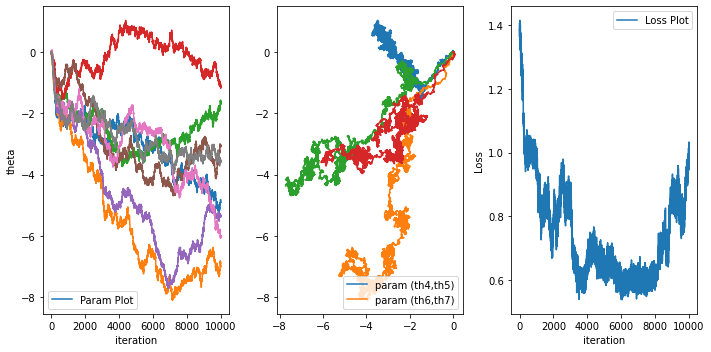

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')

axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[1].plot([item[4] for item in thdata],[item[5] for item in thdata],[item[6] for item in thdata],[item[7] for item in thdata])
axes[1].legend(['param (th4,th5)','param (th6,th7)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [8]:
def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:
        qc.barrier(qr)    
    
        for l in range(L):

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1    
     
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
     
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        qc.barrier(qr)
        for l in range(L):
        
            qc.cx(qr[1],qr[0])
            qc.cx(qr[2],qr[1])
            qc.cx(qr[3],qr[2])
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1 
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1 
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crz(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crx(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
            qc.cz(qr[1],qr[0]) 
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
            
                 
        
            for i in range(4):
                qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            qc.cz(qr[3],qr[0])            
            qc.cz(qr[1],qr[0])
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cx(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cx(qr[3],qr[2])
            qc.cx(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc









def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cz(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cz(qr[3],qr[2])
            qc.cz(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crz(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 14
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crx(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc



def circuit15(qc,qr,theta,L,repeat):
    #circuit 15
    #theta is list of the parameters
    #theta length is (8)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.cx(qr[3],qr[0])

        qc.cx(qr[2],qr[3])

        qc.cx(qr[1],qr[2])

        qc.cx(qr[0],qr[1])





        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.cx(qr[3],qr[2])

        qc.cx(qr[0],qr[3])

        qc.cx(qr[1],qr[0])

        qc.cx(qr[2],qr[1])
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.cx(qr[2],qr[1])

            qc.cx(qr[1],qr[0])
              
            qc.cx(qr[0],qr[3])

        
            qc.cx(qr[3],qr[2])
      
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.cx(qr[0],qr[1])
             
            qc.cx(qr[1],qr[2])
      
            qc.cx(qr[2],qr[3])

        
            qc.cx(qr[3],qr[0])
     
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit16(qc,qr,theta,L,repeat):
    #circuit 16
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc


    
def circuit17(qc,qr,theta,L,repeat):
    #circuit 17
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc







def circuit18(qc,qr,theta,L,repeat):
    #circuit 18
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crz(theta[count],qr[3],qr[0])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1

            qc.crz(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc



def circuit19(qc,qr,theta,L,repeat):
    #circuit 1
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crx(theta[count],qr[3],qr[0])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1

            qc.crx(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc